In [1]:
%load_ext watermark
%watermark -v -m  -u -n -p pandas,numpy,matplotlib,sklearn -a Filippo_Valle -g -r -b -w

Filippo_Valle 
last updated: Fri Jul 10 2020 

CPython 3.7.6
IPython 7.15.0

pandas 1.0.4
numpy 1.18.5
matplotlib 3.2.1
sklearn 0.0

compiler   : GCC 7.5.0
system     : Linux
release    : 4.19.76-linuxkit
machine    : x86_64
processor  : x86_64
CPU cores  : 2
interpreter: 64bit
Git hash   : 251fb0f8164450c4e383df3cbf21951a4a5a7654
Git repo   : git@github.com:fvalle1/cancers
Git branch : develop
watermark 2.0.2


In [2]:
import requests as rq
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from sklearn import metrics
import os,sys
sys.path.append(os.getcwd())

from hsbmpy import get_max_available_L, clusteranalysis

# Breast

## Load results

In [3]:
level = 1
algorithm = 'topsbm'
directory = "breast"
L=get_max_available_L(directory, algorithm)
df_clusters = pd.read_csv("%s/%s/%s_level_%d_clusters.csv"%(directory,algorithm,algorithm,L), header=[0])
df_clusters.head()

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8
0,87fcecde-b317-4518-bea1-cc8d14a18107.FPKM.txt.gz,8682197b-7b3d-4d3f-8f3d-8be702aa02fd.FPKM.txt.gz,8dfe19ae-aec1-4de5-9b94-1a48c05c11c5.FPKM.txt.gz,c592e62e-5de0-4c40-8e4c-f56b9546a545.FPKM.txt.gz,899a4fae-569f-463c-8cb1-049b9d50b9f4.FPKM.txt.gz,97be5457-526d-42ee-ace4-d900b8c6fd5f.FPKM.txt.gz,b5dc51e7-76d4-480f-bc2f-a0fc74947c35.FPKM.txt.gz,55030097-d293-41e0-a554-38f40282b6dc.FPKM.txt.gz
1,eaf65f67-8d04-49ec-8bf6-883237d6e67e.FPKM.txt.gz,e1877a07-b5ec-4ada-89cb-525e5abf966a.FPKM.txt.gz,1d102e83-ede2-460e-ab2e-f42d8db6970e.FPKM.txt.gz,cf7e72eb-b82f-44c8-894c-3995571ffe81.FPKM.txt.gz,446db9e9-d5aa-48ba-a84d-cf6a7d8f8fc4.FPKM.txt.gz,9f0d673f-ff69-4d01-910c-f04921b538a2.FPKM.txt.gz,1651f9c4-219f-4d46-adcc-6003c91eb059.FPKM.txt.gz,d5f0ea64-6660-49ac-a37e-3cd747045147.FPKM.txt.gz
2,c64c76e7-635c-458e-a032-07775aeb03d9.FPKM.txt.gz,205e7e19-1169-41a2-ac34-f8e1088e1015.FPKM.txt.gz,a6f657a3-439e-4afd-be04-413f2ed02828.FPKM.txt.gz,ca223822-8759-42a7-8058-ccd90a02320f.FPKM.txt.gz,70029e42-3b29-48f5-908e-7cd203103277.FPKM.txt.gz,b033c85a-2395-4ced-a84d-ac1fbce674bf.FPKM.txt.gz,0733fd68-9cd5-440a-a849-fb14ef76c00d.FPKM.txt.gz,NaN
3,b8e564b0-affd-4137-a10c-be4fe254a905.FPKM.txt.gz,bceffa81-996d-4775-a452-23b31a25daf9.FPKM.txt.gz,f641a19d-8497-4bc7-9df1-5228adfd5334.FPKM.txt.gz,bdd8c340-250b-474a-8802-7653b7884ced.FPKM.txt.gz,dc0592cf-5a96-4aed-86b2-eb7de5492b7c.FPKM.txt.gz,07d9b7c5-d77b-4b89-8c65-10e98149bdeb.FPKM.txt.gz,0f5282f4-e702-41f2-b93f-a1966203879f.FPKM.txt.gz,NaN
4,9bfd1930-f3c9-48f2-8b02-4d01b70b4ea0.FPKM.txt.gz,1f853089-c40d-4bee-9833-837f327b275a.FPKM.txt.gz,111d998f-4133-436a-9990-64cb293a986e.FPKM.txt.gz,23f8f5e2-25b8-4b43-b939-66e7e3f55977.FPKM.txt.gz,7af2075c-0386-4971-ae25-375330ef6cec.FPKM.txt.gz,ba08bef5-b401-4327-8923-bd5cfe44bb11.FPKM.txt.gz,d6b9e128-8f20-43a1-9d16-b3e2b3d60e34.FPKM.txt.gz,NaN


In [4]:
df_files = pd.read_csv("%s/files.dat"%directory, index_col=[0], header=[0]).dropna(axis=1, how='all').dropna(axis=0, how='all')
samples = pd.read_csv("%s/%s/%s_level_0_clusters.csv"%(directory,algorithm,algorithm), header=[0]).astype(str).values.ravel()
samples=samples[samples!="nan"]
df_files = df_files.reindex(index=samples).dropna(how="all", axis=0).fillna("unknown")
labels = df_files.columns
labels

Index(['cases.0.submitter_id', 'cases.0.diagnoses.0.primary_diagnosis',
       'cases.0.diagnoses.0.morphology',
       'cases.0.diagnoses.0.tissue_or_organ_of_origin',
       'cases.0.diagnoses.0.tumor_grade', 'cases.0.diagnoses.0.tumor_stage',
       'cases.0.project.disease_type', 'cases.0.project.primary_site',
       'Tumor.Type', 'Included_in_previous_marker_papers', 'vital_status',
       'days_to_birth', 'days_to_death', 'days_to_last_followup',
       'age_at_initial_pathologic_diagnosis', 'pathologic_stage',
       'BRCA_Pathology', 'BRCA_Subtype_PAM50', 'CNV Clusters',
       'Mutation Clusters', 'DNA.Methylation Clusters', 'mRNA Clusters',
       'miRNA Clusters', 'lncRNA Clusters', 'Protein Clusters',
       'PARADIGM Clusters', 'Pan-Gyn Clusters', 'birth_year', 'death_year',
       'age', 'age_binned', 'cancer.type', 'Subtype_mRNA', 'Subtype_Selected',
       'Subtype_Selected_Lum'],
      dtype='object')

In [5]:
labels=['Subtype_Selected_Lum', 'BRCA_Subtype_PAM50']

True Subtype_Selected_Lum 3


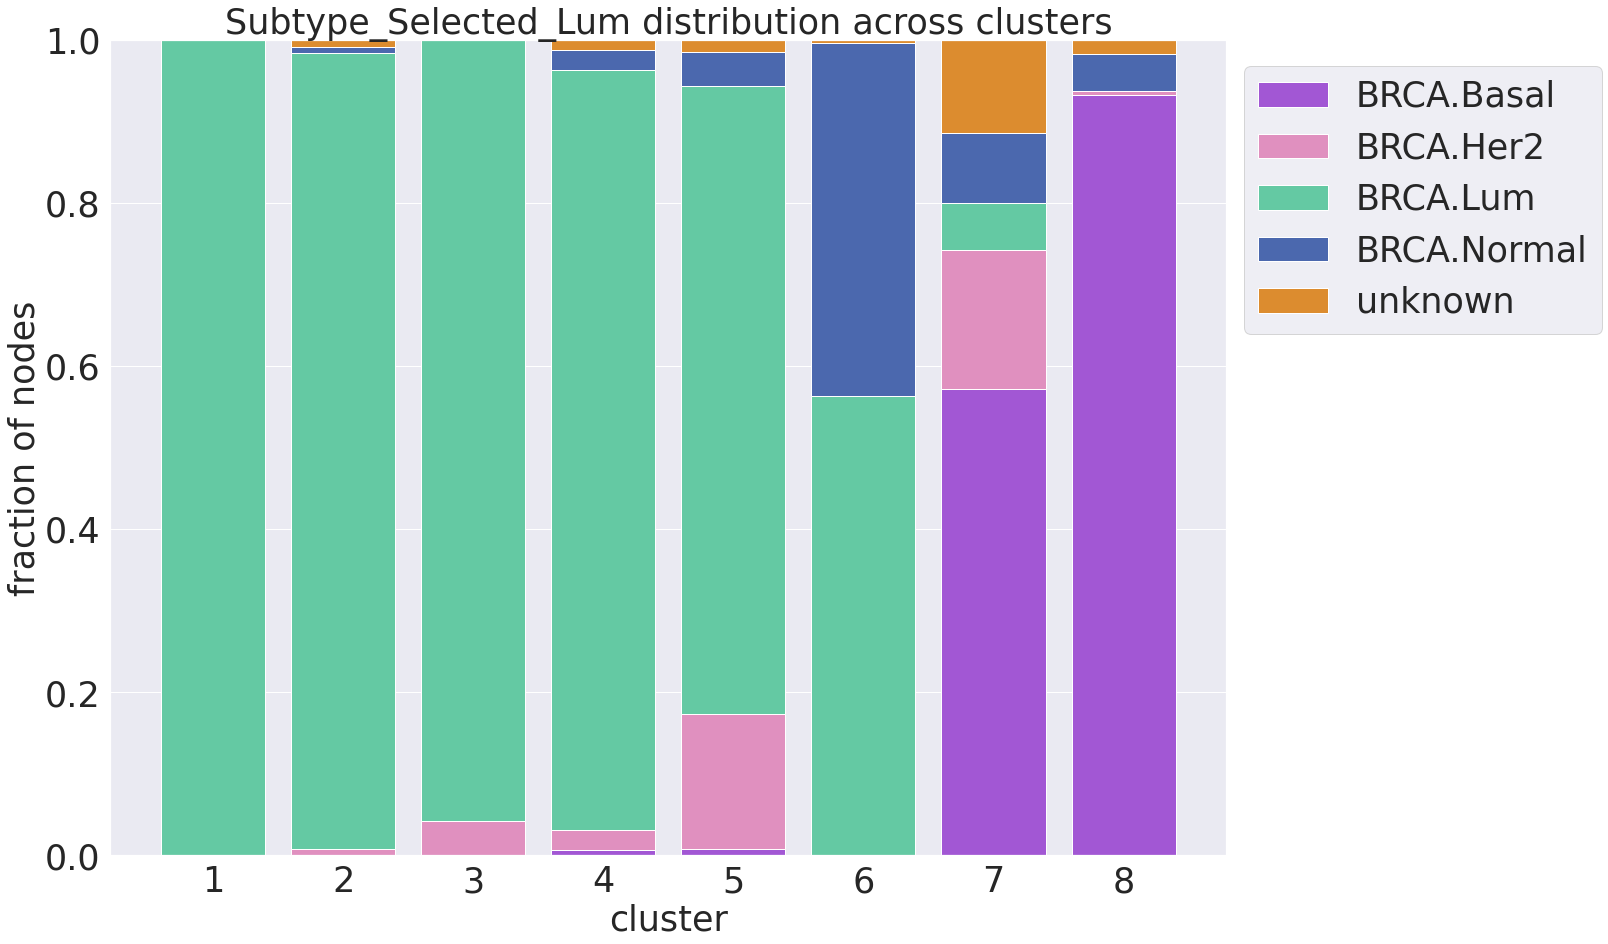

True Subtype_Selected_Lum 2


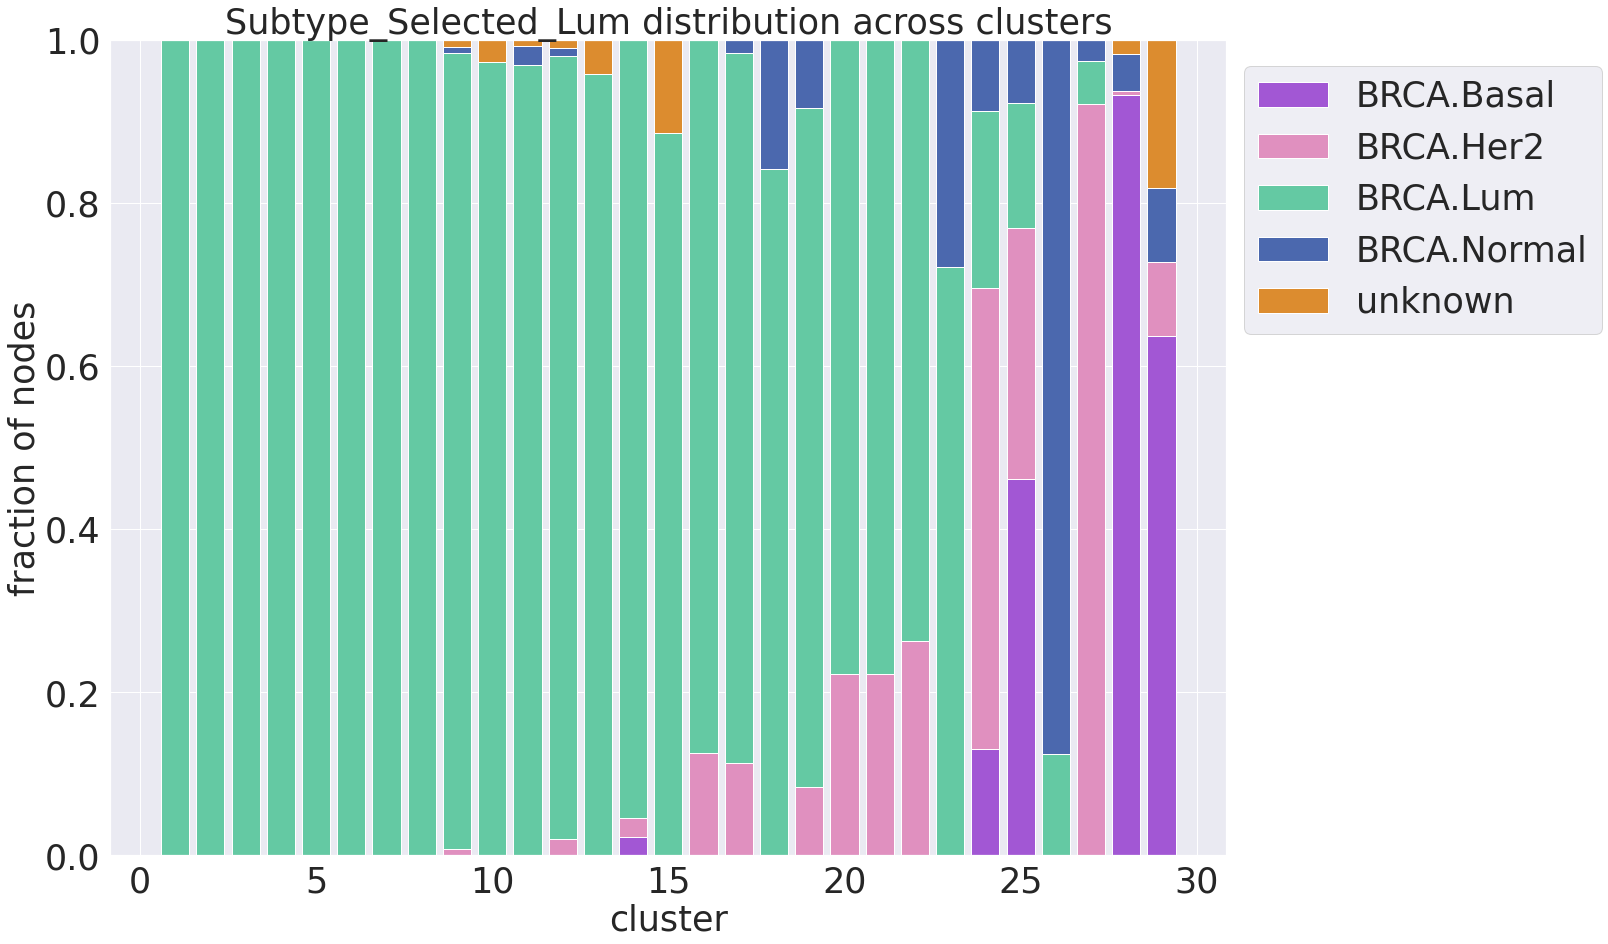

True Subtype_Selected_Lum 1


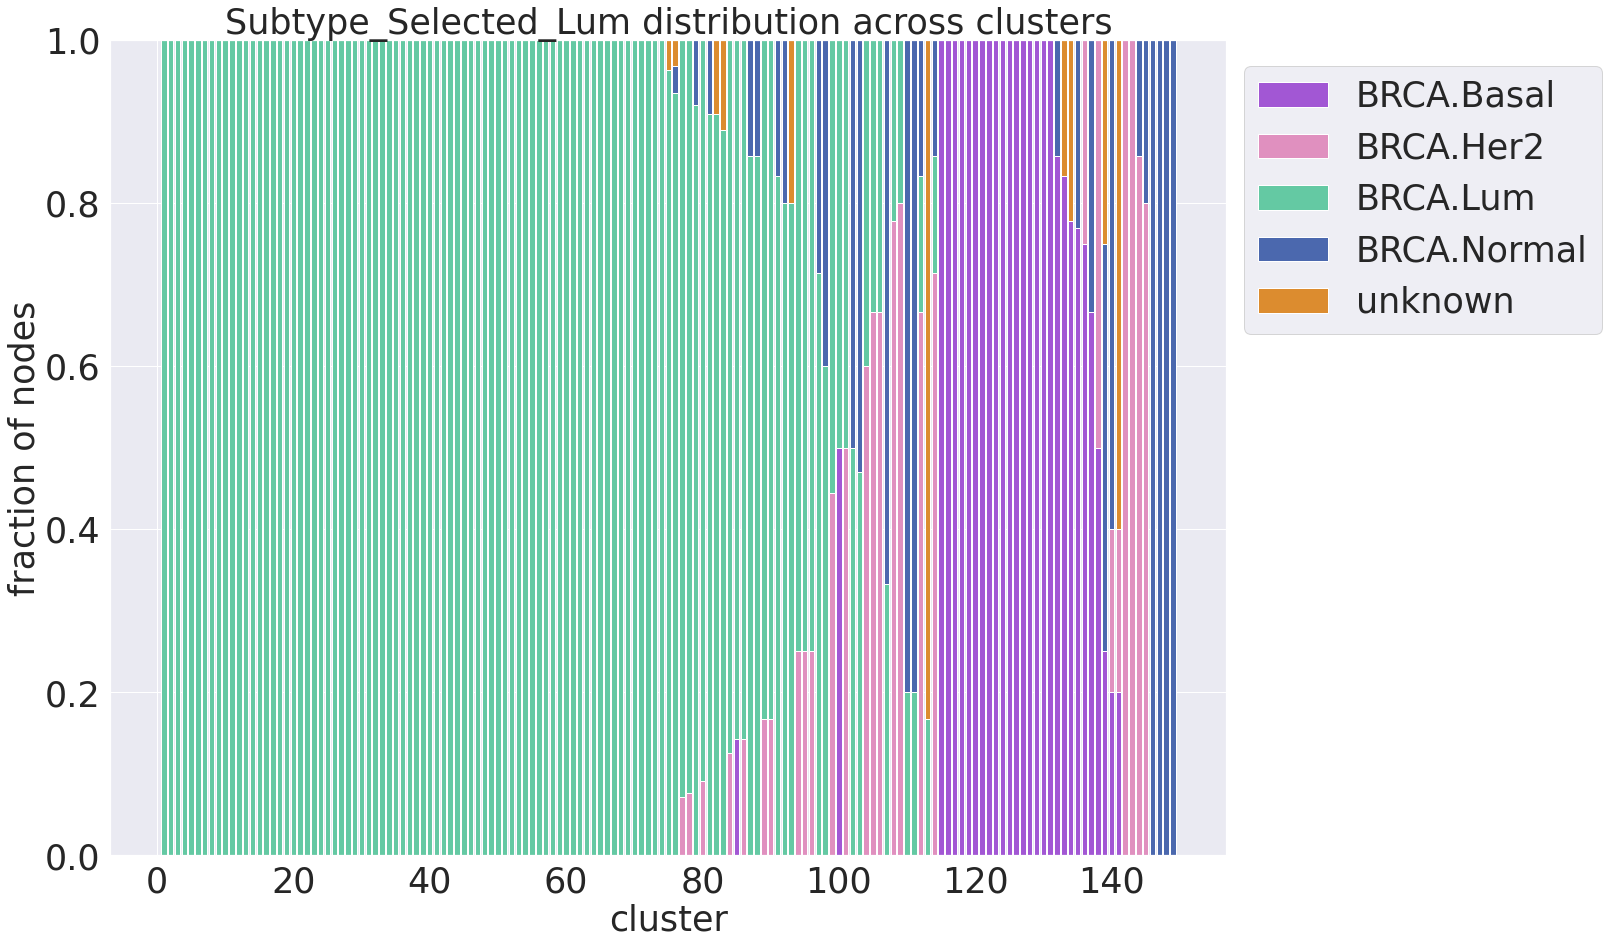

True Subtype_Selected_Lum 0
True BRCA_Subtype_PAM50 3


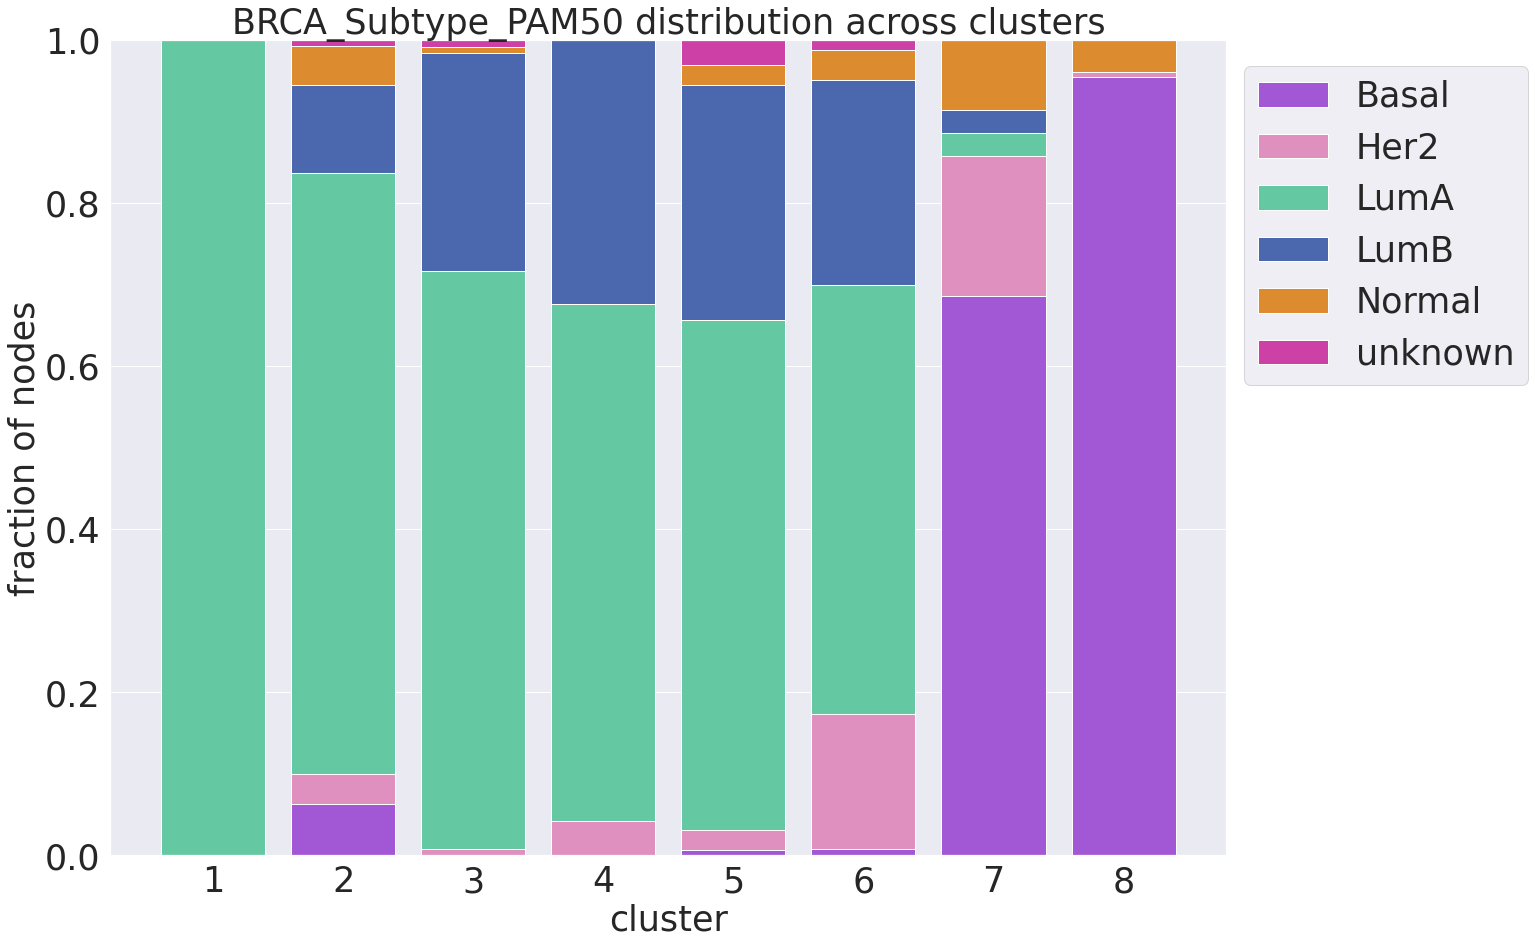

True BRCA_Subtype_PAM50 2


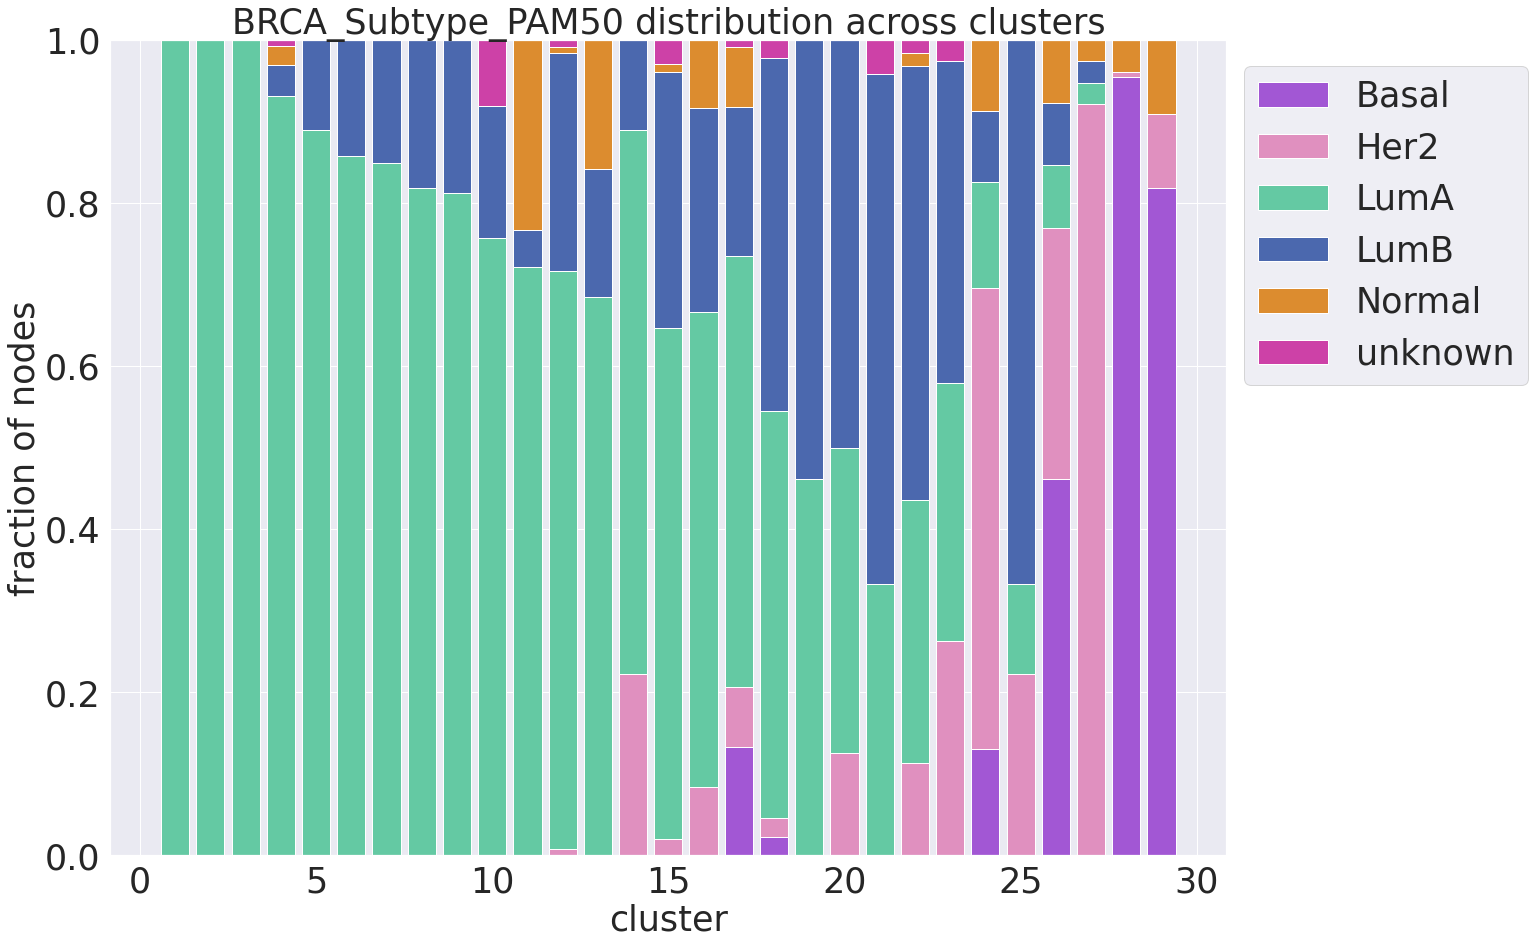

True BRCA_Subtype_PAM50 1


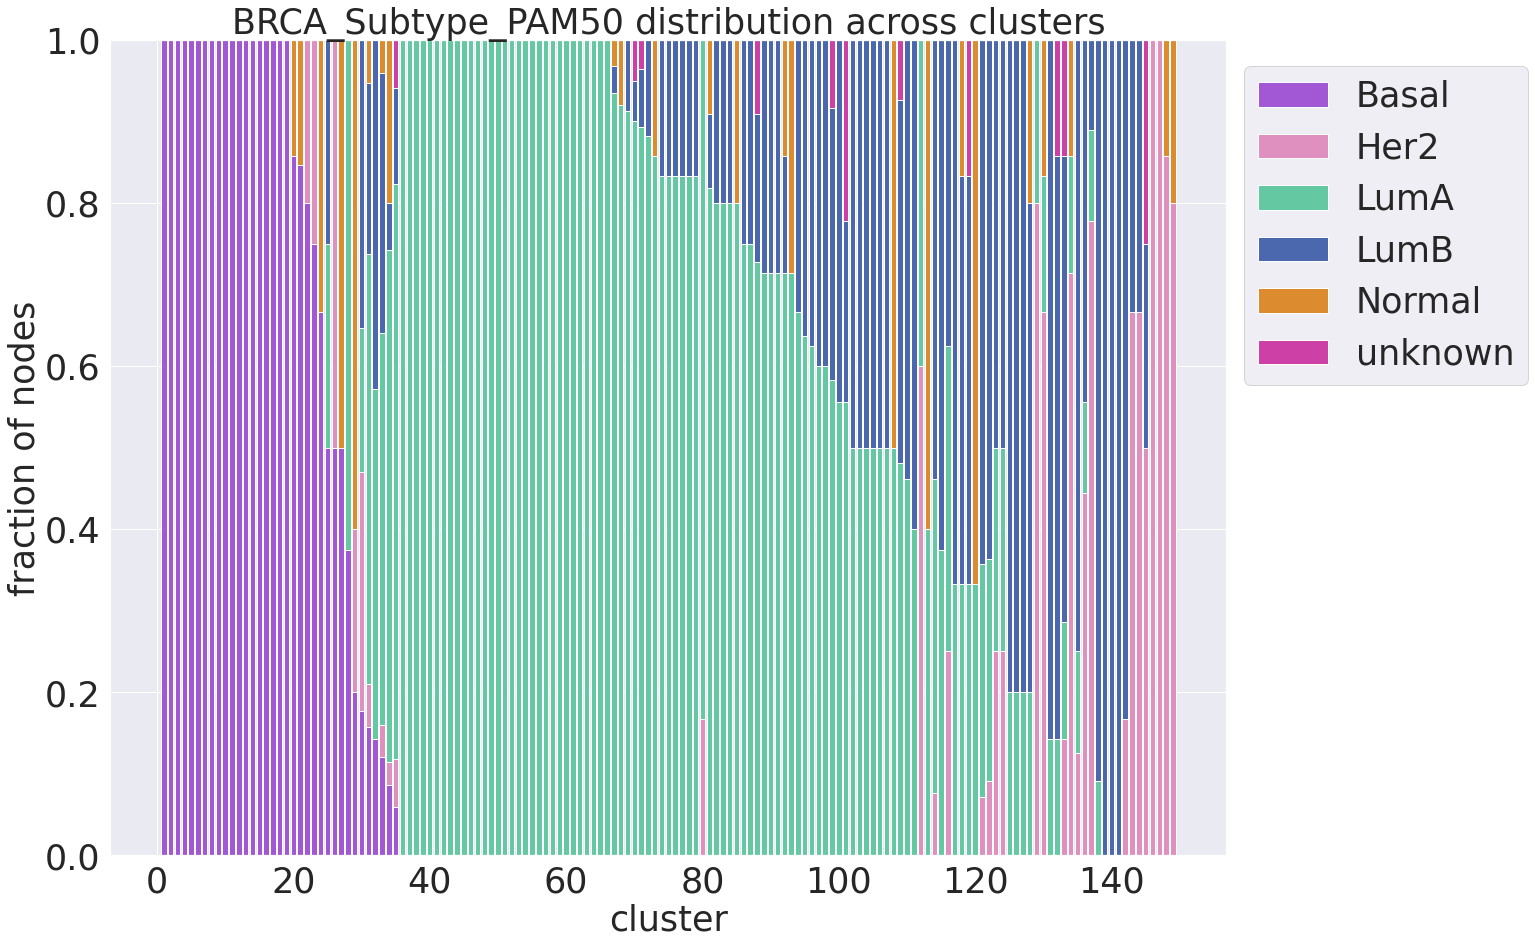

True BRCA_Subtype_PAM50 0
False Subtype_Selected_Lum 3


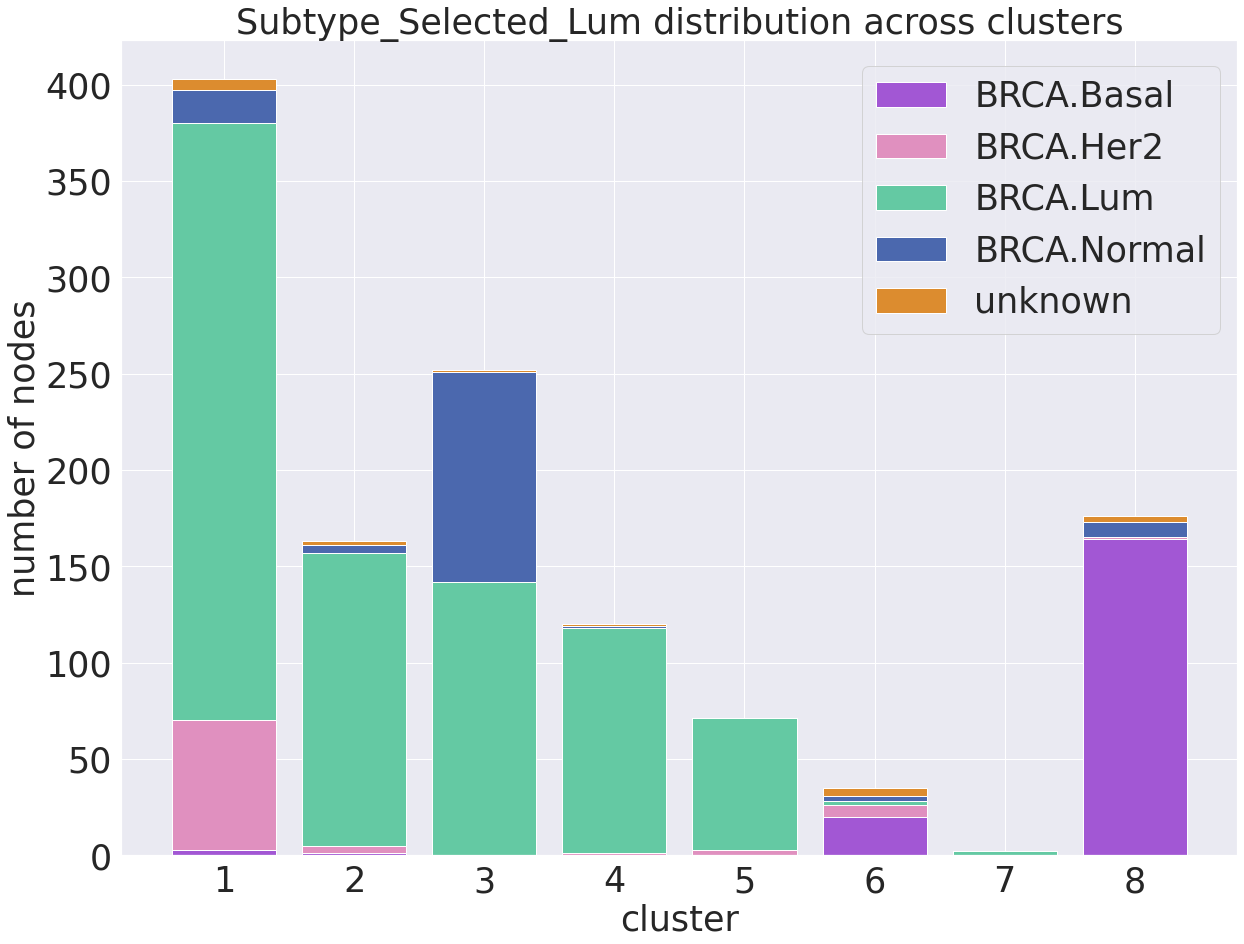

False Subtype_Selected_Lum 2


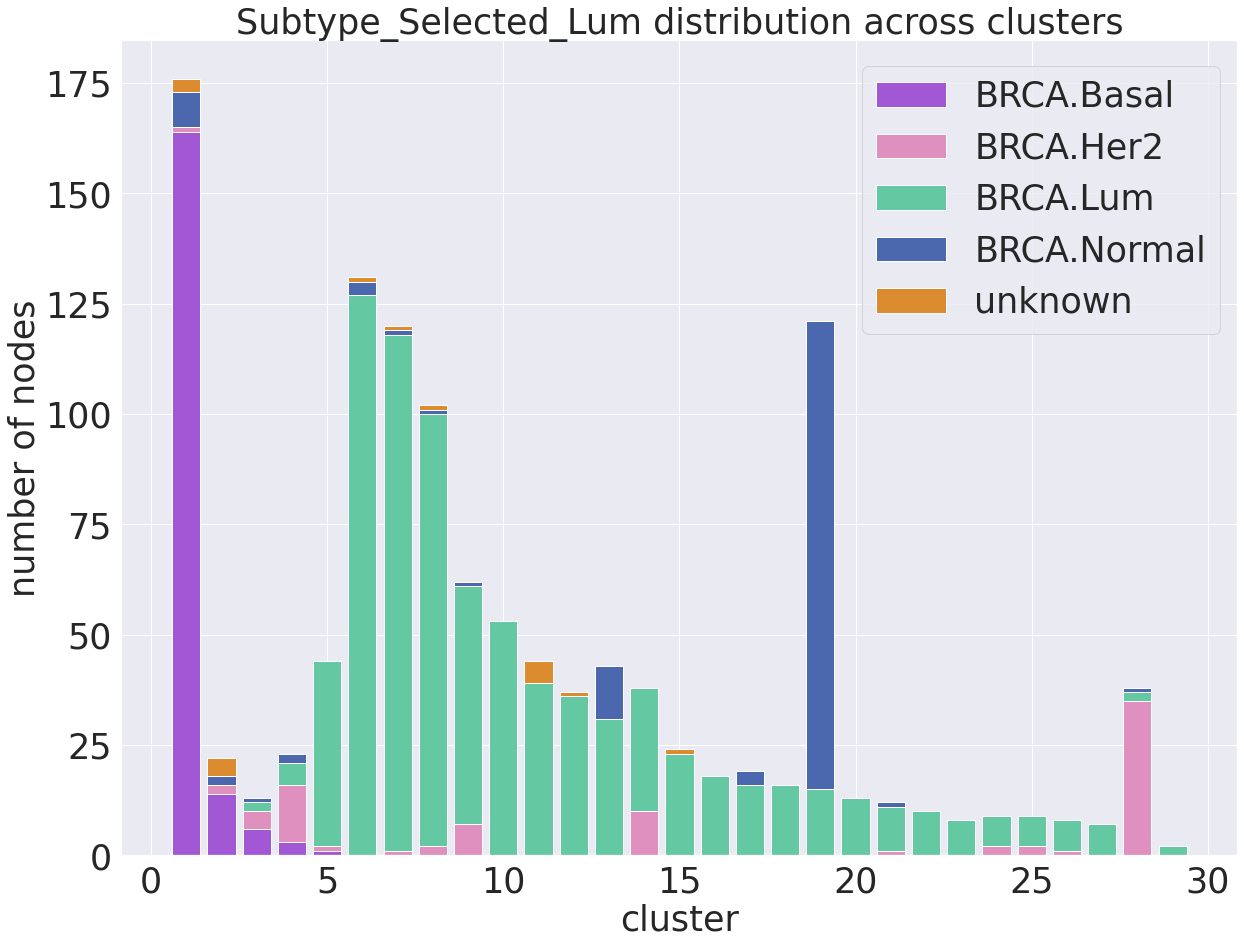

False Subtype_Selected_Lum 1


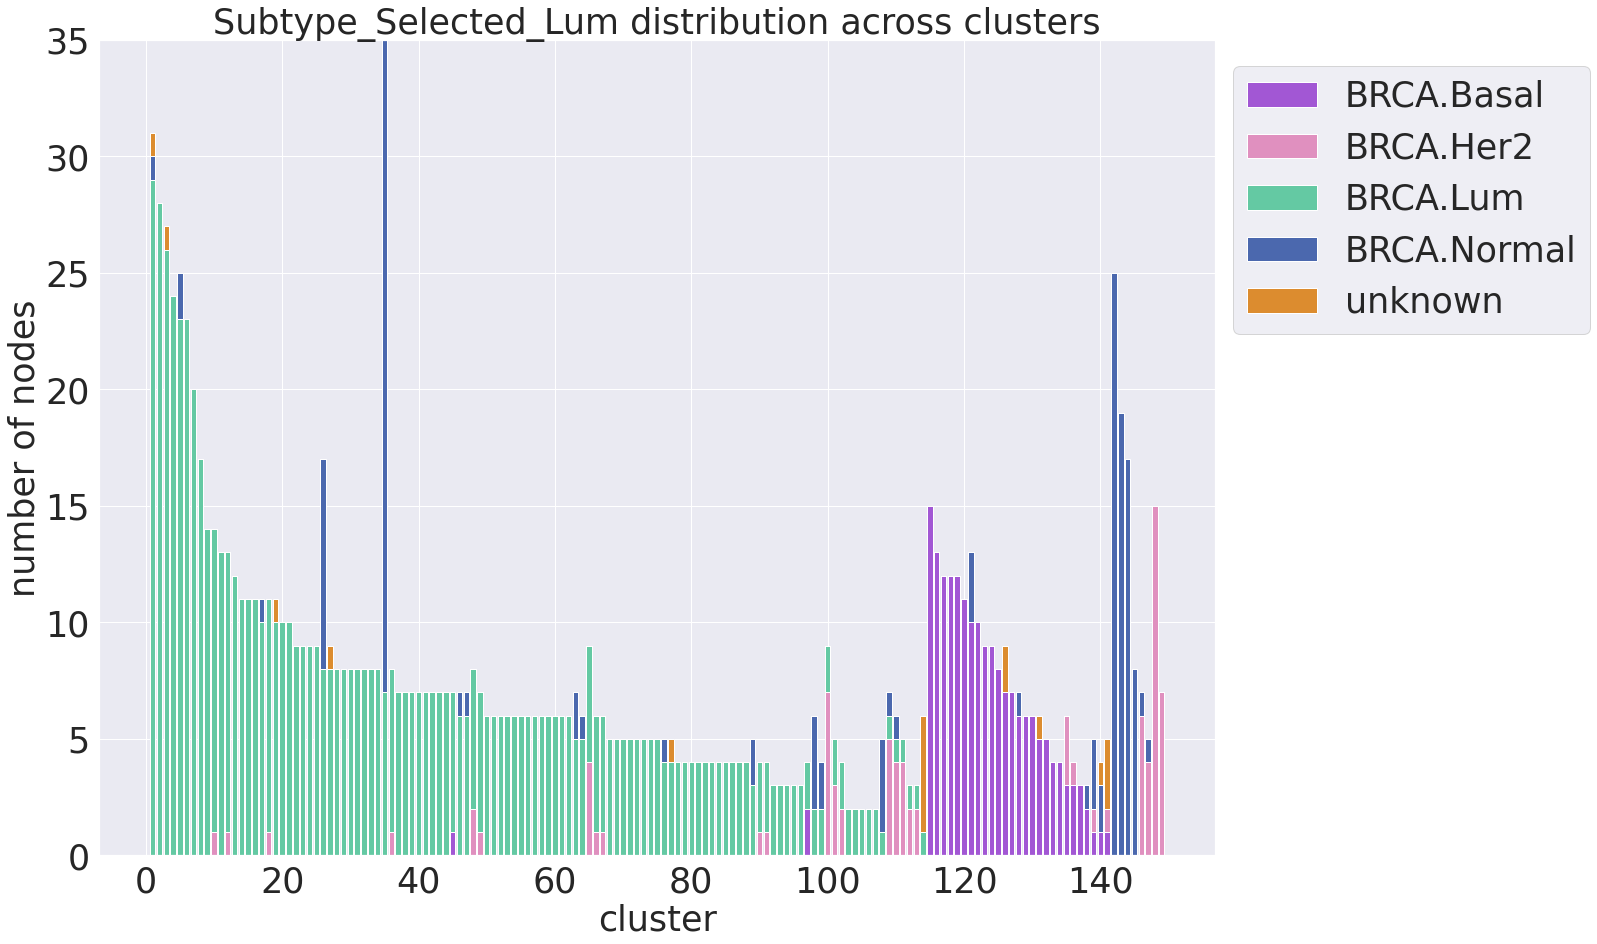

False Subtype_Selected_Lum 0
False BRCA_Subtype_PAM50 3


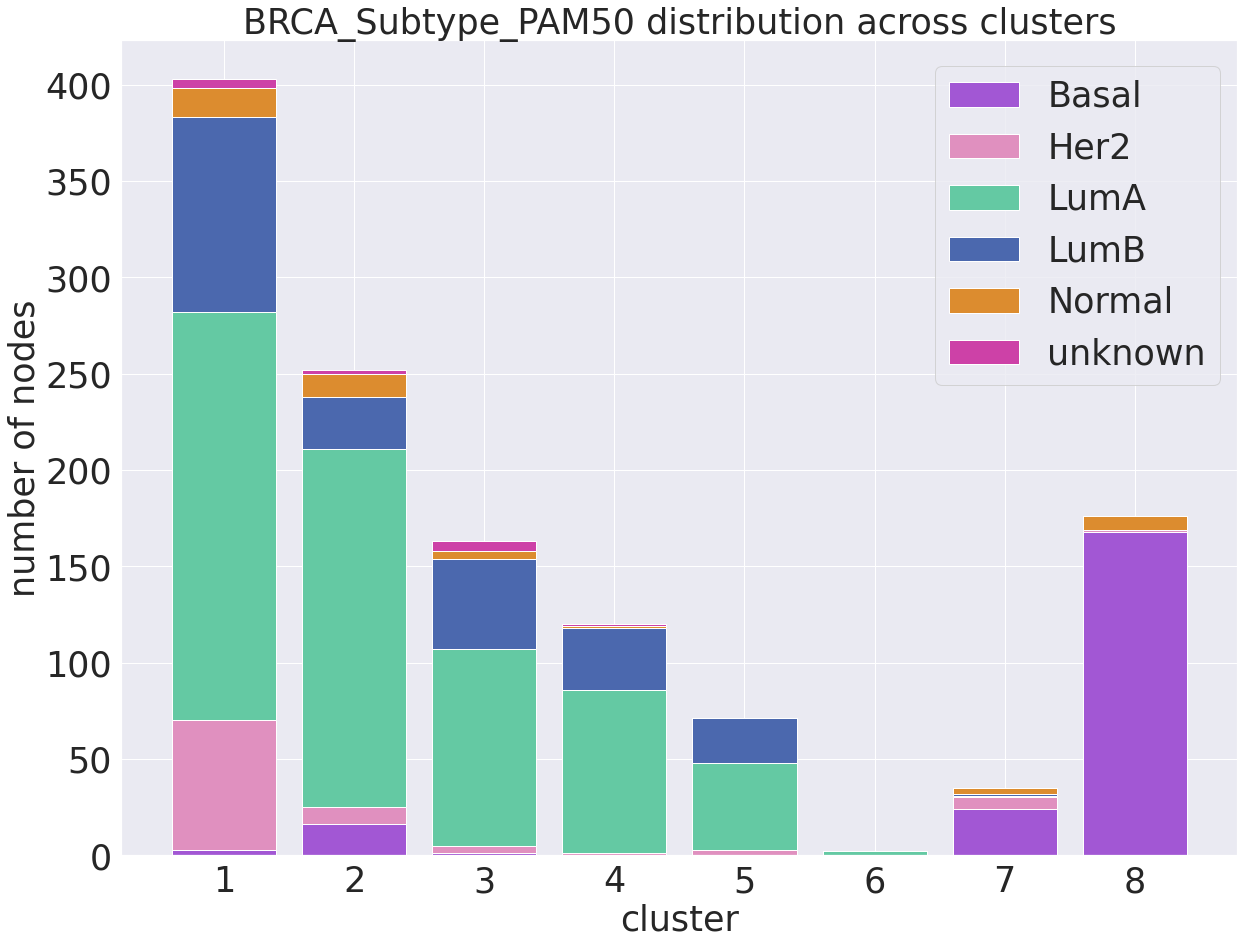

False BRCA_Subtype_PAM50 2


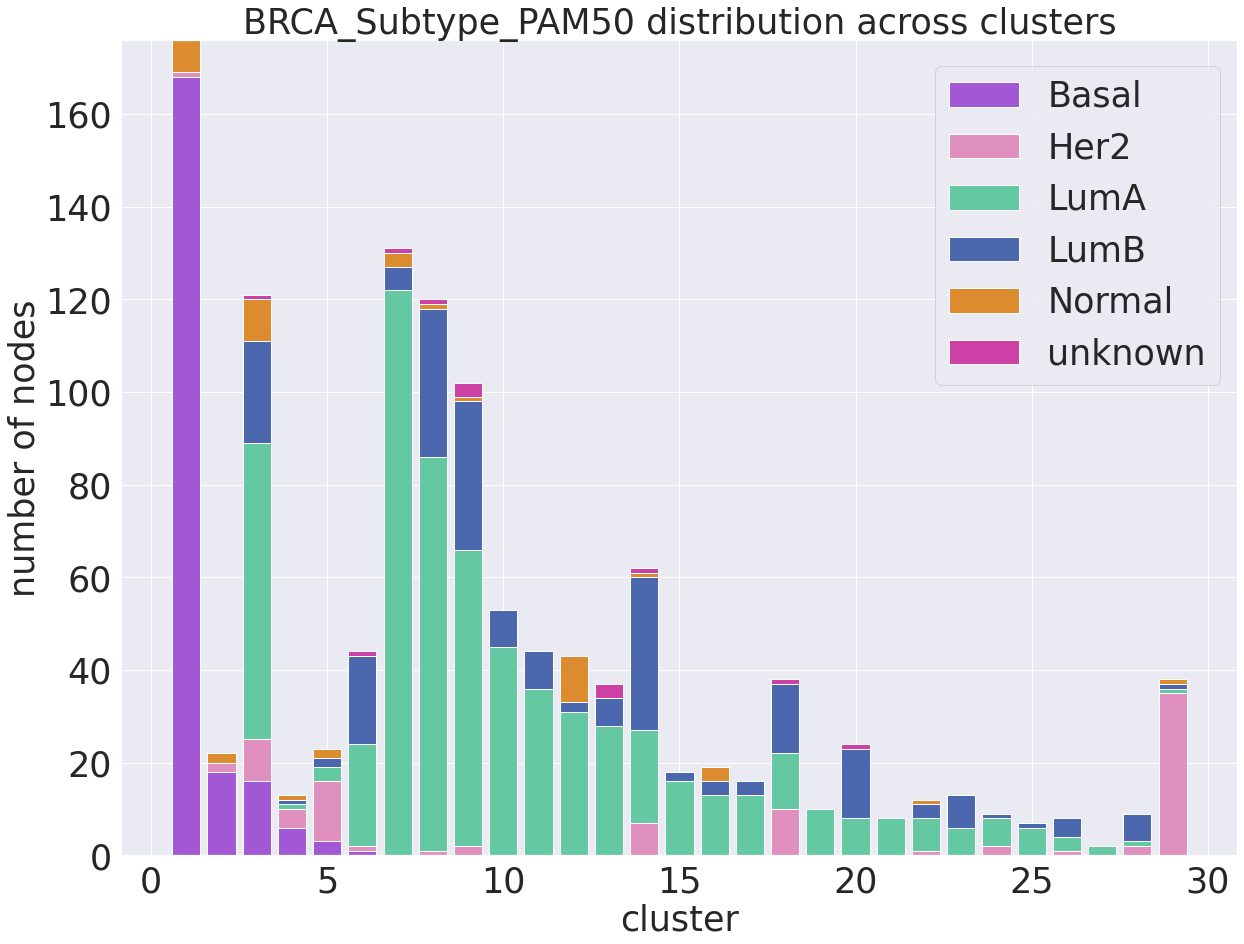

False BRCA_Subtype_PAM50 1


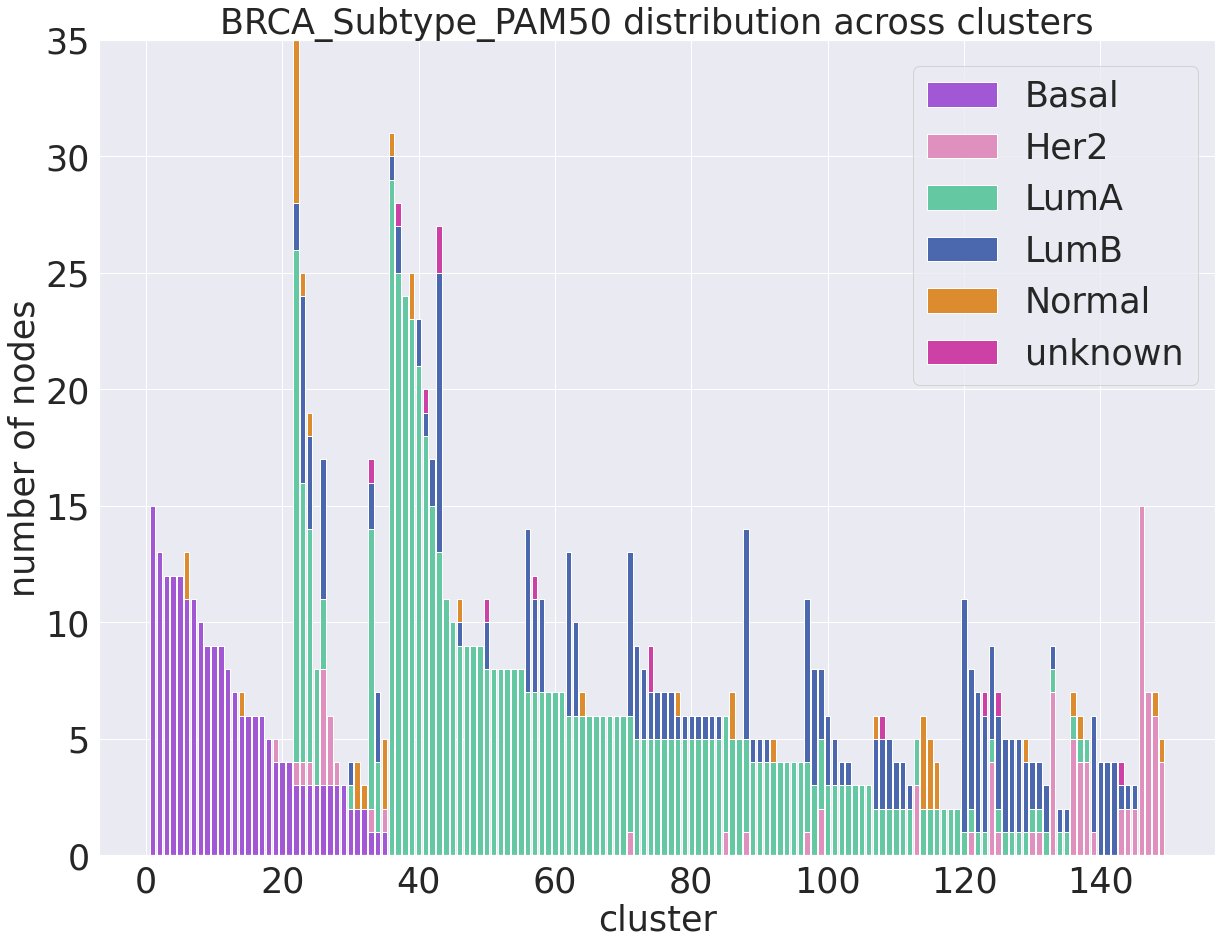

False BRCA_Subtype_PAM50 0


In [6]:
clusteranalysis(directory, labels)

### Plot tree

The next cell creates a file to load with [tree_plotter/plot_tree.ipynb](tree_plotter/plot_tree.ipynb)

Please change there the following line to read the file we're going to create
```python
df_hier = pd.read_csv("../breast/topsbm/topsbm_labels.csv")
```

In [7]:
def reindex(x):
    i=0
    last=x[0]
    new = []
    for xi in x:
        if xi == last:
            pass
        else:
            i+=1
            last=xi
        new.append(i)
    return new

from hsbmpy import get_file

df_labels = pd.DataFrame()
shape = df_clusters.dropna().shape
files = pd.read_csv("%s/%s/%s_level_3_clusters.csv"%(directory,algorithm,algorithm), header=[0]).astype(str).values.ravel()
files = files[files!="nan"]

for level in np.arange(L+1)[::-1]:
    df_clusters = pd.read_csv("%s/%s/%s_level_%d_clusters.csv"%(directory,algorithm,algorithm,level), header=[0])
    print("level ", level, "with ", df_clusters.shape[1], " clusters")
    currentlevellabels = []
    for file in files:
        s = df_clusters[df_clusters.isin([file])].any(0)
        a = s.index[s]
        currentlevellabels.append(int(a[0][8:])-1)
    df_labels.insert(0,'l%d'%level,currentlevellabels)
    del currentlevellabels
filelabels = []
filesublabels = []
for file in files:
    try:
        filelabels.append(get_file(file, df_files)[labels[0]])
    except:
        filelabels.append('unknown')
        print(*sys.exc_info())
    try:
        filesublabels.append(get_file(file, df_files)[labels[1]])
    except:
        filesublabels.append('unknown')
df_labels.insert(0,'tissue', filelabels)
df_labels.insert(0,'subtissue', filesublabels)
df_labels.sort_values(by=['tissue','subtissue'], inplace=True)
df_labels.sort_values(by=["l%d"%l for l in np.arange(L+1)[::-1]], axis=0, inplace=True)
filelabels = df_labels['tissue']
filesublabels = df_labels['subtissue']
df_labels = df_labels.apply(reindex, axis=0)
df_labels['tissue']=filelabels
df_labels['subtissue']=filesublabels
df_labels.to_csv("%s/%s/topsbm_labels.csv"%(directory,algorithm), index=False, header=True)

level  3 with  8  clusters
level  2 with  29  clusters
level  1 with  149  clusters
level  0 with  1204  clusters


## Scores

In [8]:
from hsbmpy import get_scores, get_scores_shuffled

labels = ["Subtype_Selected", "BRCA_Subtype_PAM50"]

scores = get_scores(directory, labels, verbose=False)
scores['hsbm'] = scores[labels[0]]
scores['shuffle'] = get_scores_shuffled(directory, df_files, label=labels[0], algorithm='topsbm')

In [9]:
scores["tissues"] = get_scores(directory, labels, algorithm='topsbm', verbose=False)[labels[0]]
scores["sub_tissues"] = get_scores(directory, labels, algorithm='topsbm', verbose=False)[labels[1]]
scores[labels[0]] = scores["tissues"]
scores[labels[1]] = scores["sub_tissues"]

In [10]:
from hsbmpy import normalise_score
if "mixed" in scores.keys():
    scores.pop("mixed")
norm_scores = scores.copy()
normalise_score(norm_scores, base_algorithm="hsbm")

In [11]:
analyses = {
    "all": ['hsbm', 'tm', 'hierarchical', 'lda', 'wgcna', 'shuffle'],
    "subtypes": ["Subtype_Selected", "BRCA_Subtype_PAM50",'shuffle'],
    "hsbm": ["hsbm", "hsbm-sweep", "hsbm-log2","hsbm-log10",'shuffle'],
    "subtissues": ["tissues", "sub_tissues",'shuffle']
}

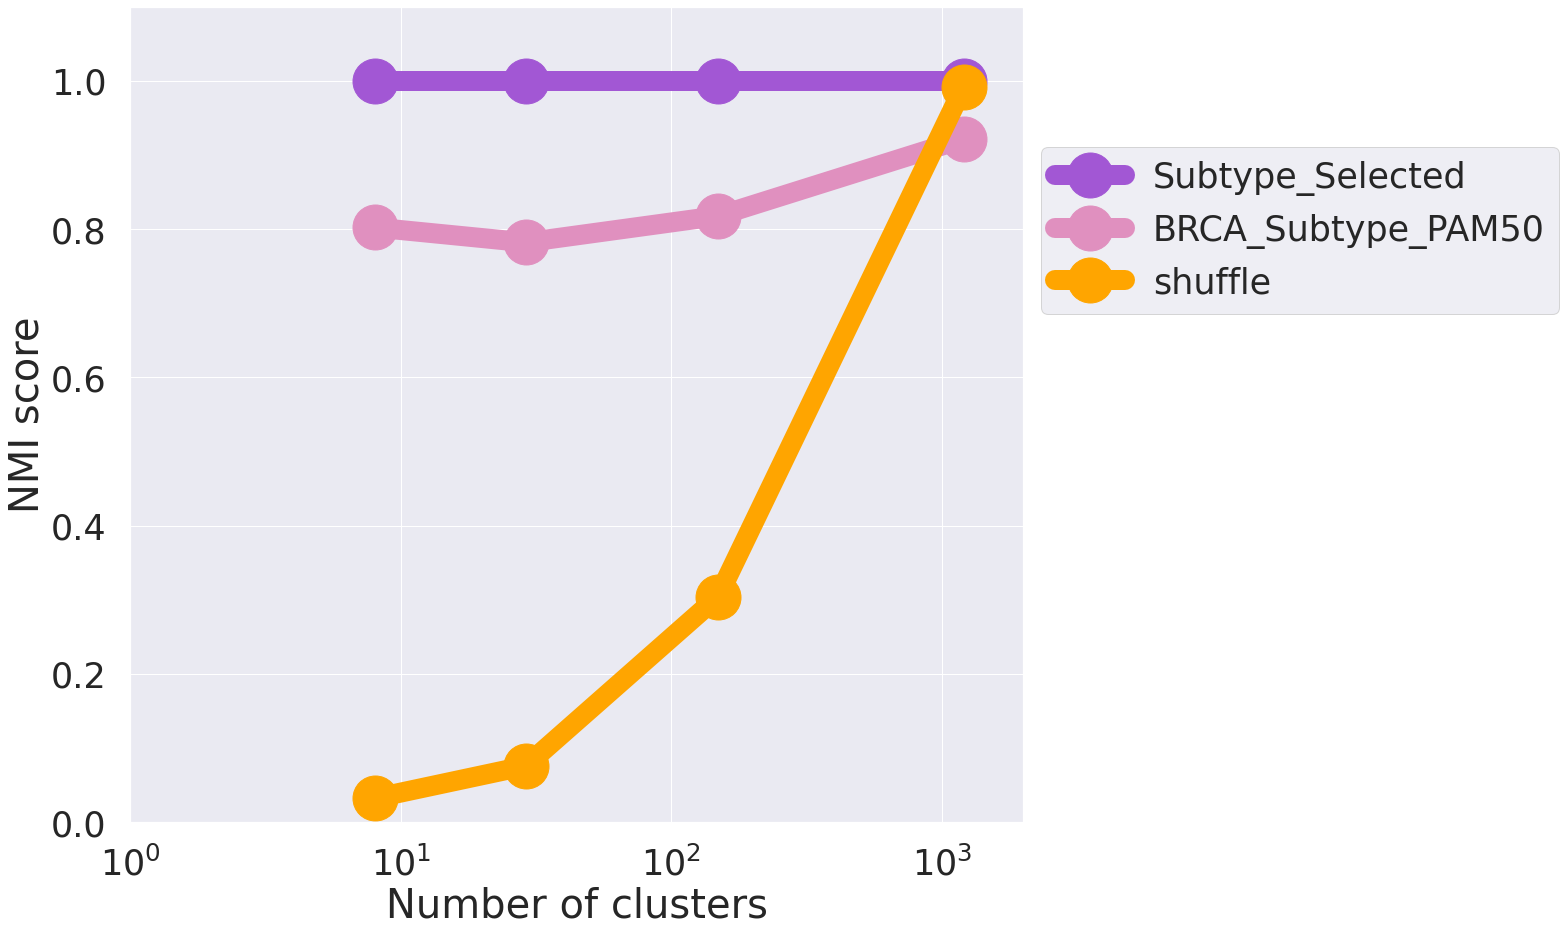

In [12]:
analysis = "subtypes"

from hsbmpy import add_score_lines

fig=plt.figure(figsize=(20,15))
ax = fig.subplots(1)
add_score_lines(ax,scores, labels=analyses[analysis])
#ax.set_xscale('linear')
plt.xlim(1,2000)
plt.show()
fig.savefig("%s/metric_scores_%s.pdf"%(directory,analysis))

# Lung

## Load results

In [13]:
level = 1
algorithm = 'topsbm'
directory = "lung"
L=get_max_available_L(directory, algorithm)
df_clusters = pd.read_csv("%s/%s/%s_level_%d_clusters.csv"%(directory,algorithm,algorithm,L), header=[0])
df_clusters.head()

,Cluster 1,Cluster 2
0,dc0ce32f-d5aa-489f-ba4b-e01443815121.FPKM.txt.gz,b1558748-bec9-4bea-a35b-040ca9a1f4cd.FPKM.txt.gz
1,6d158f35-9847-41fd-814e-9bb63cca955f.FPKM.txt.gz,6f9413df-3cff-4e32-87a0-b3e891ffa786.FPKM.txt.gz
2,a22817b9-da0e-45cd-ba5d-3eb790e273cb.FPKM.txt.gz,15975c7c-40b7-4782-a4e8-a484f11ac63f.FPKM.txt.gz
3,f204f6b8-03fb-4464-922d-de9fffeff9d5.FPKM.txt.gz,840bb854-0669-485e-9d83-c4e1e4f10626.FPKM.txt.gz
4,b2bd3b9d-2380-47bb-a13d-a4e7a00d6740.FPKM.txt.gz,dc76cdde-f77f-4604-94c4-0b150b9a56b4.FPKM.txt.gz


In [14]:
df_files = pd.read_csv("%s/files.dat"%directory, index_col=[0], header=[0]).dropna(axis=1, how='all').dropna(axis=0, how='all')
samples = pd.read_csv("%s/%s/%s_level_0_clusters.csv"%(directory,algorithm,algorithm), header=[0]).astype(str).values.ravel()
samples=samples[samples!="nan"]
df_files = df_files.reindex(index=samples).dropna(how="all", axis=0).fillna("unknown")
labels = df_files.columns
labels

Index(['cases.0.submitter_id', 'cases.0.diagnoses.0.morphology',
       'cases.0.diagnoses.0.primary_diagnosis',
       'cases.0.diagnoses.0.tissue_or_organ_of_origin',
       'cases.0.diagnoses.0.tumor_grade', 'cases.0.diagnoses.0.tumor_stage',
       'cases.0.project.disease_type', 'cases.0.project.primary_site',
       'cases.0.samples.0.longest_dimension',
       'cases.0.samples.0.portions.0.analytes.0.aliquots.0.submitter_id',
       'cancer.type', 'Subtype_mRNA', 'Subtype_DNAmeth', 'Subtype_Integrative',
       'Subtype_Selected'],
      dtype='object')

In [15]:
labels=['cancer.type']

True cancer.type 2


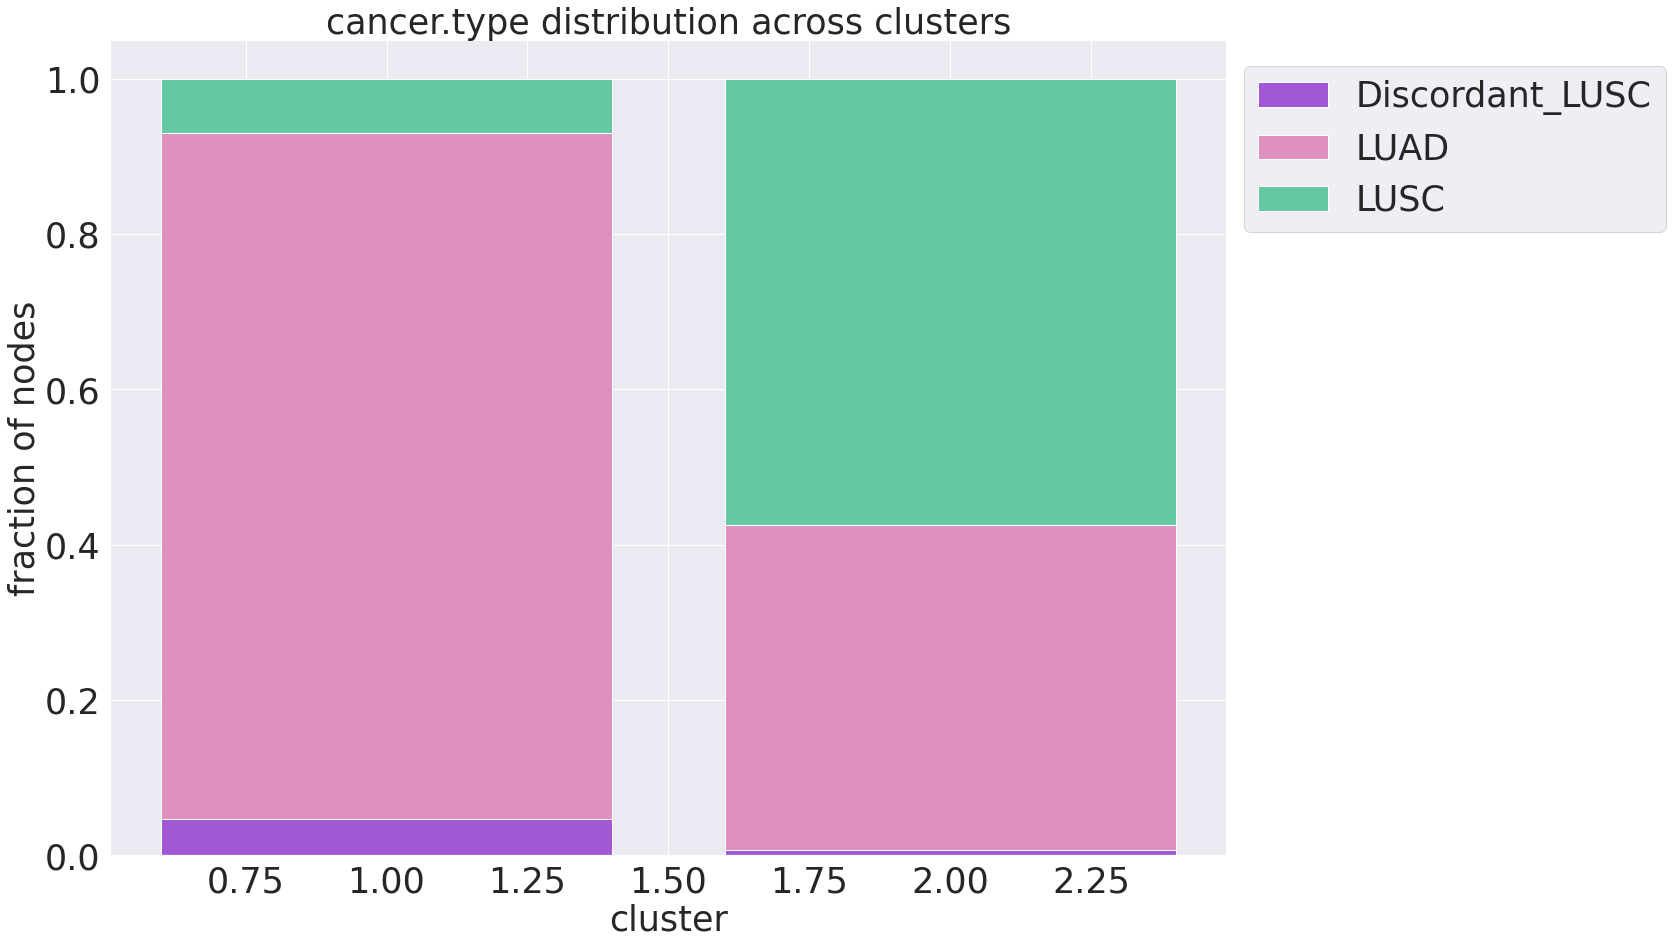

True cancer.type 1


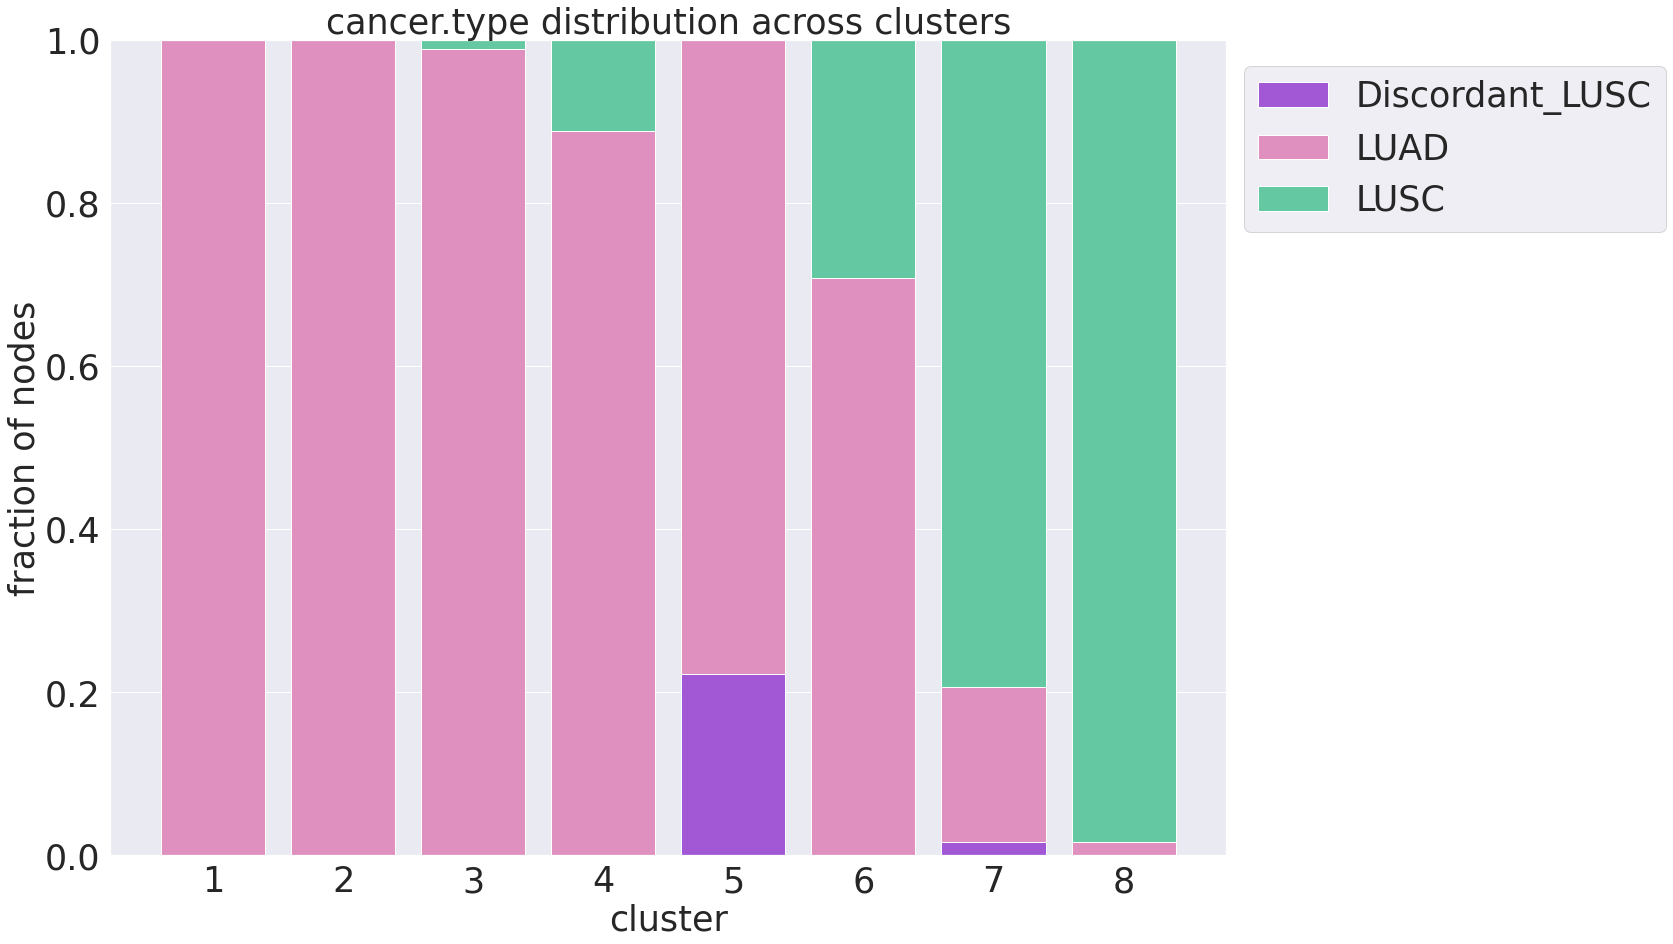

True cancer.type 0


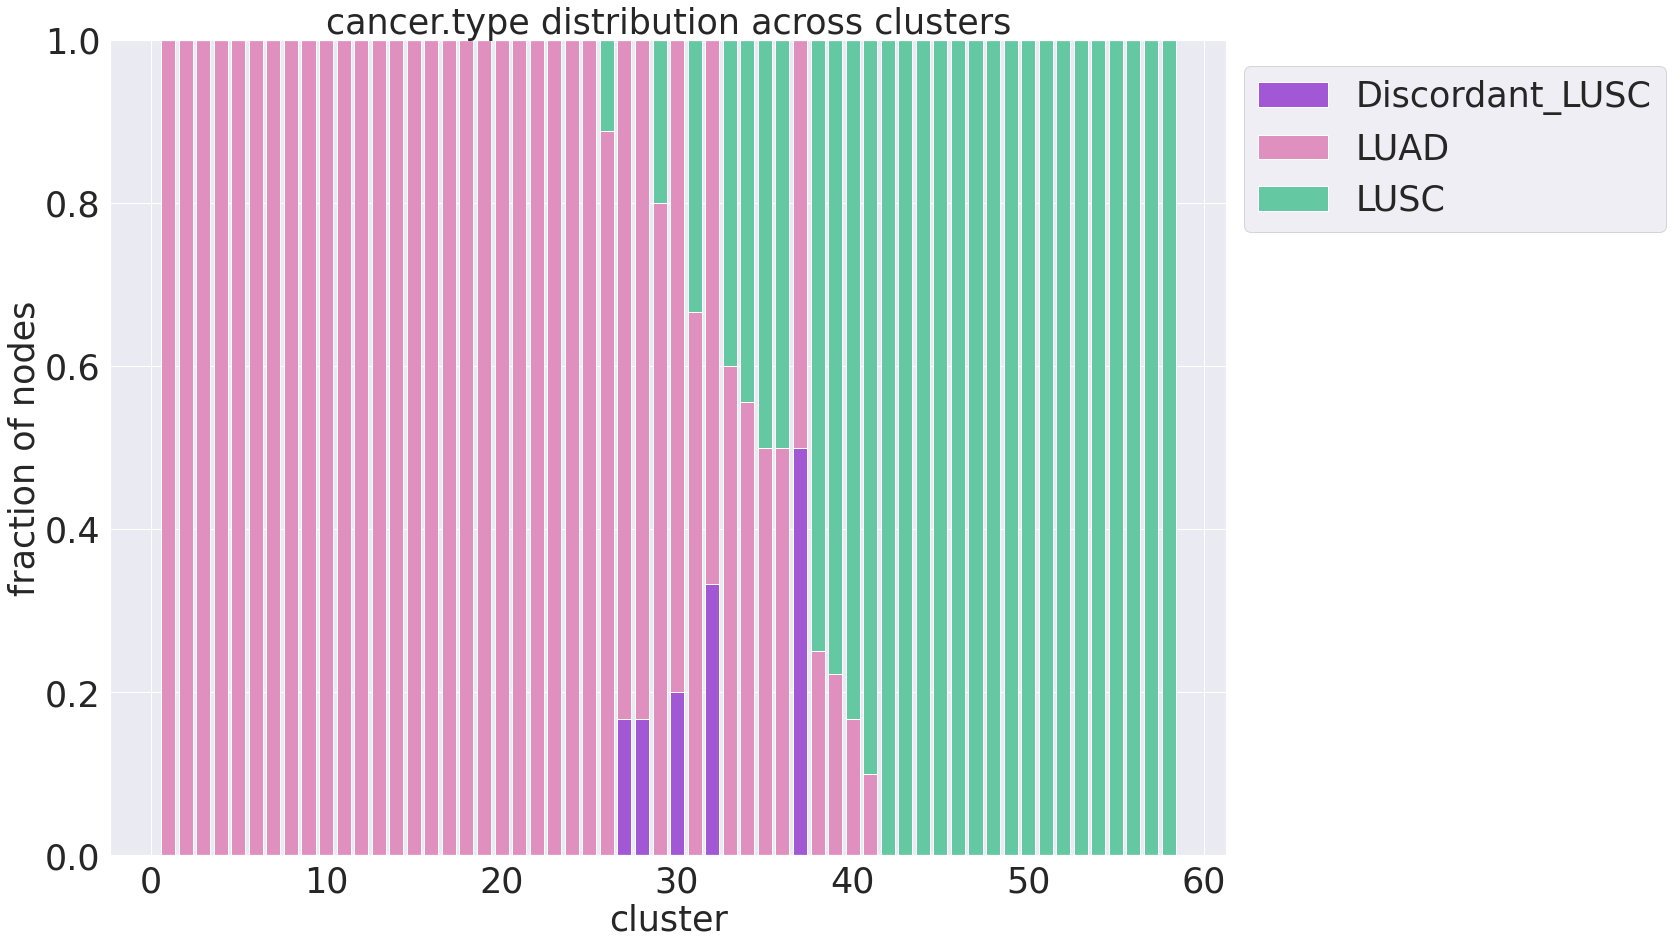

False cancer.type 2


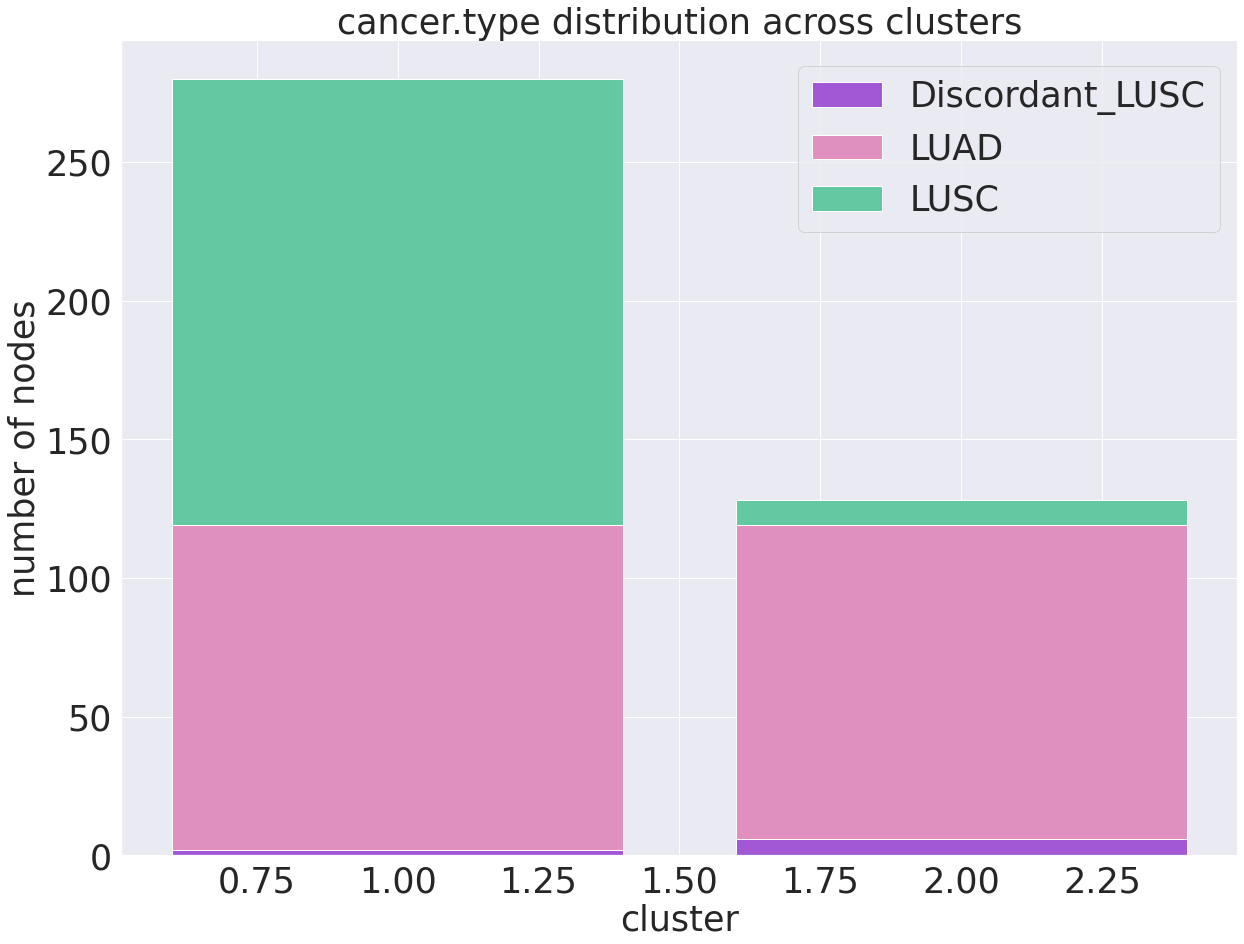

False cancer.type 1


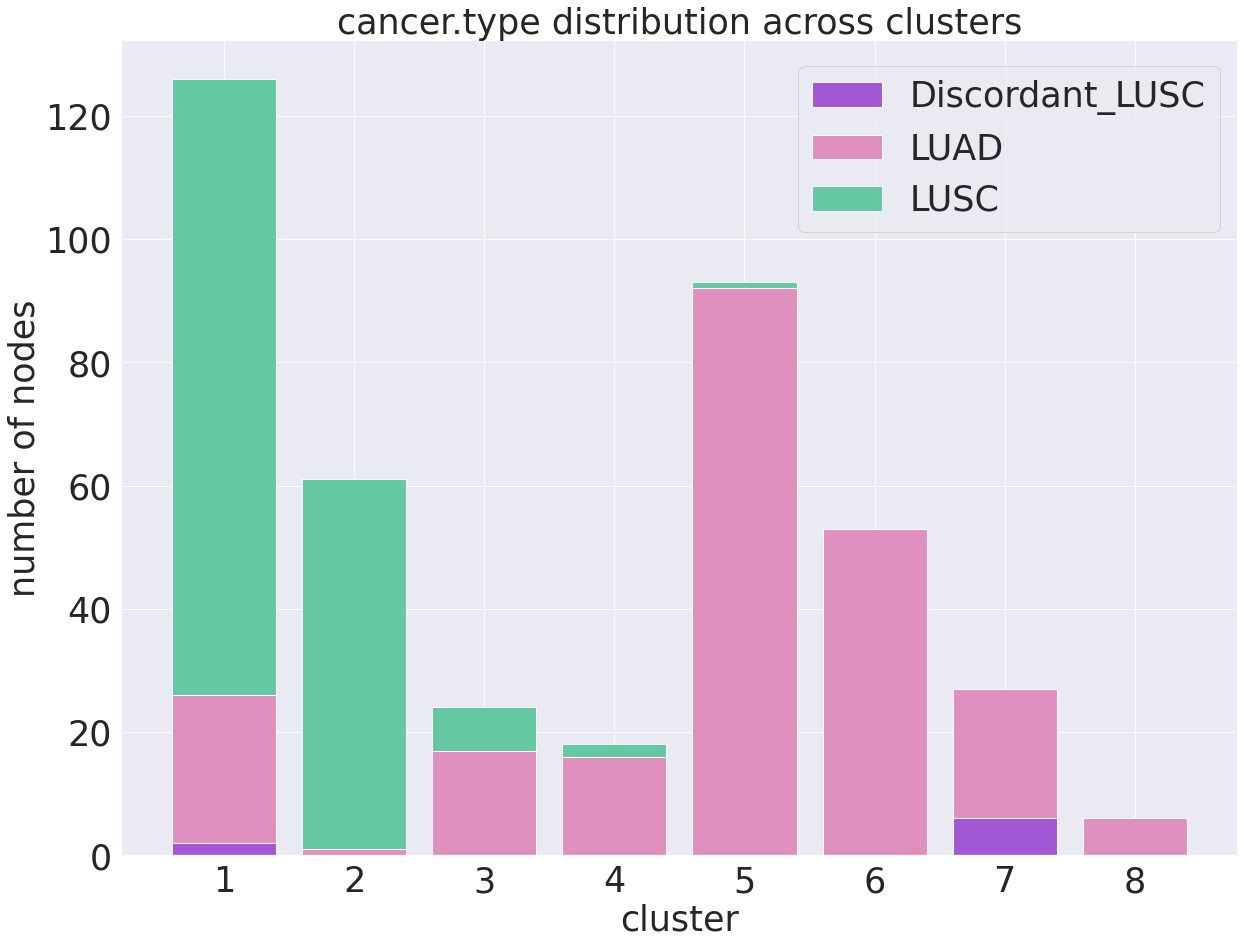

False cancer.type 0


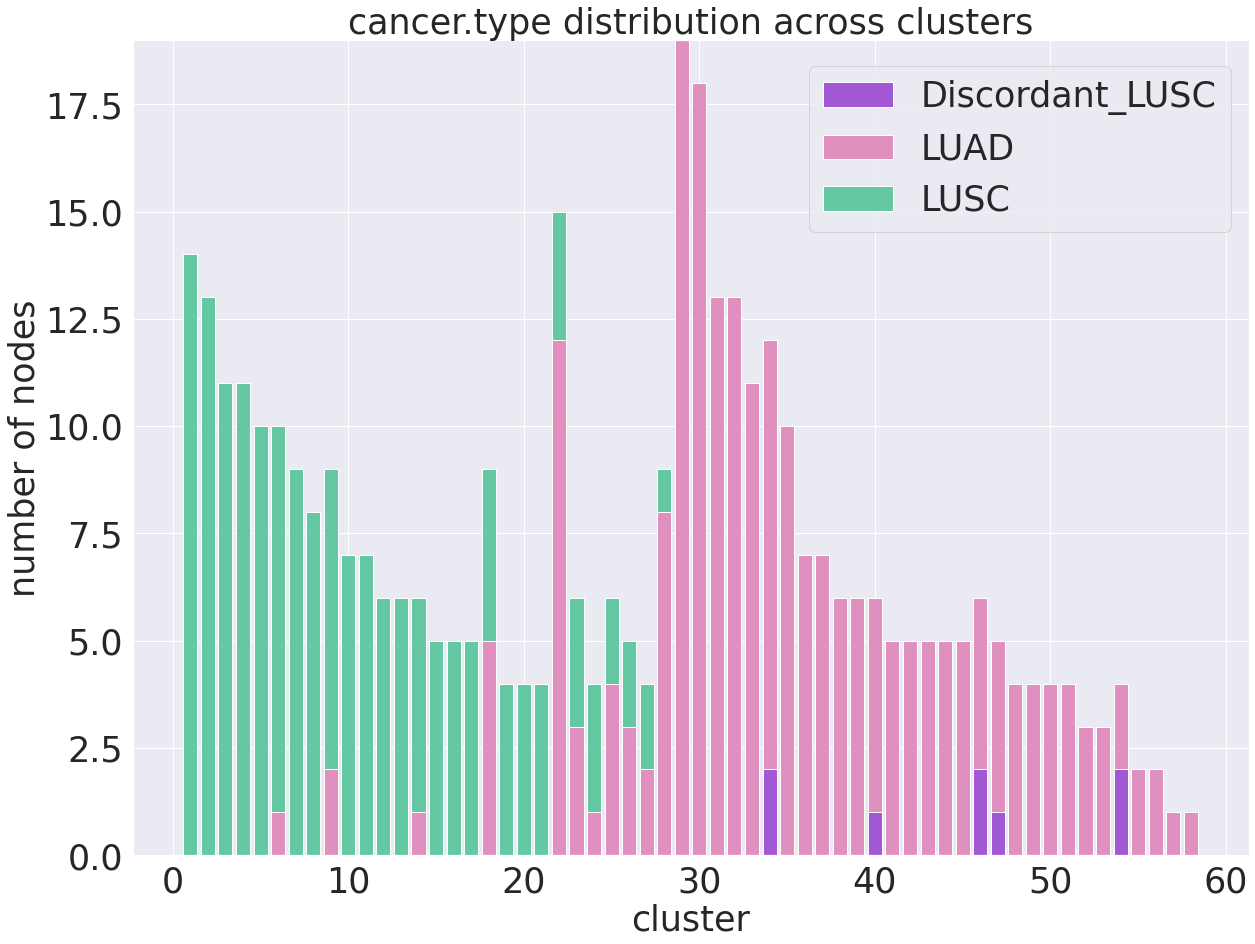

In [16]:
clusteranalysis(directory, labels)

### Plot Tree

In [17]:
def reindex(x):
    i=0
    last=x[0]
    new = []
    for xi in x:
        if xi == last:
            pass
        else:
            i+=1
            last=xi
        new.append(i)
    return new

from hsbmpy import get_file

df_labels = pd.DataFrame()
shape = df_clusters.dropna().shape
files = pd.read_csv("%s/%s/%s_level_2_clusters.csv"%(directory,algorithm,algorithm), header=[0]).astype(str).values.ravel()
files = files[files!="nan"]

for level in np.arange(L+1)[::-1]:
    df_clusters = pd.read_csv("%s/%s/%s_level_%d_clusters.csv"%(directory,algorithm,algorithm,level), header=[0])
    print("level ", level, "with ", df_clusters.shape[1], " clusters")
    currentlevellabels = []
    for file in files:
        s = df_clusters[df_clusters.isin([file])].any(0)
        a = s.index[s]
        currentlevellabels.append(int(a[0][8:])-1)
    df_labels.insert(0,'l%d'%level,currentlevellabels)
    del currentlevellabels
filelabels = []
filesublabels = []
for file in files:
    try:
        filelabels.append(get_file(file, df_files)[labels[0]])
    except:
        filelabels.append('unknown')
        print(*sys.exc_info())
    try:
        filesublabels.append(get_file(file, df_files)[labels[1]])
    except:
        filesublabels.append('unknown')
df_labels.insert(0,'tissue', filelabels)
df_labels.insert(0,'subtissue', filesublabels)
df_labels.sort_values(by=['tissue','subtissue'], inplace=True)
df_labels.sort_values(by=["l%d"%l for l in np.arange(L+1)[::-1]], axis=0, inplace=True)
filelabels = df_labels['tissue']
filesublabels = df_labels['subtissue']
df_labels = df_labels.apply(reindex, axis=0)
df_labels['tissue']=filelabels
df_labels['subtissue']=filesublabels
df_labels.to_csv("%s/%s/topsbm_labels.csv"%(directory,algorithm), index=False, header=True)

level  2 with  2  clusters
level  1 with  8  clusters
level  0 with  58  clusters


# Unified lung

In [18]:
level = 1
algorithm = 'topsbm'
directory = "unified_lung"
L=get_max_available_L(directory, algorithm)
df_clusters = pd.read_csv("%s/%s/%s_level_%d_clusters.csv"%(directory,algorithm,algorithm,L), header=[0])
df_clusters.head()

,Cluster 1,Cluster 2
0,TCGA-64-1680-01A-02R-0946-07,TCGA-38-4625-01A-01R-1206-07
1,TCGA-66-2759-01A-01R-0851-07,TCGA-38-4625-01A-01R-1206-07-1
2,TCGA-NC-A5HI-01A-11R-A26W-07,NaN
3,TCGA-60-2721-01A-01R-0851-07,NaN
4,TCGA-63-A5MG-01A-12R-A27Q-07,NaN


In [19]:
df_files = pd.read_csv("%s/files.dat"%directory, index_col=[0], header=[0]).dropna(axis=1, how='all').dropna(axis=0, how='all')
samples = pd.read_csv("%s/%s/%s_level_0_clusters.csv"%(directory,algorithm,algorithm), header=[0]).astype(str).values.ravel()
samples=samples[samples!="nan"]
df_files = df_files.reindex(index=samples).dropna(how="all", axis=0).fillna("unknown")
labels = df_files.columns
labels

Index(['primary_site', 'status', 'dataset', 'tissue_hd', 'Subtype', 'Type',
       'file_name', 'cases.0.demographic.days_to_birth',
       'cases.0.demographic.days_to_death', 'cases.0.demographic.gender',
       'cases.0.demographic.vital_status',
       'cases.0.diagnoses.0.age_at_diagnosis',
       'cases.0.diagnoses.0.last_known_disease_status',
       'cases.0.diagnoses.0.morphology',
       'cases.0.diagnoses.0.primary_diagnosis',
       'cases.0.diagnoses.0.tissue_or_organ_of_origin',
       'cases.0.diagnoses.0.tumor_grade', 'cases.0.diagnoses.0.tumor_stage',
       'cases.0.exposures.0.cigarettes_per_day',
       'cases.0.exposures.0.years_smoked', 'cases.0.project.disease_type',
       'cases.0.project.primary_site', 'cases.0.project.project_id',
       'cases.0.samples.0.longest_dimension', 'cases.0.submitter_id'],
      dtype='object')

In [20]:
labels=['Type']

In [21]:
df_files["Type"].unique()

array(['LUSC', 'healthy', 'LUAD', 'Discordant_LUSC'], dtype=object)

True Type 3


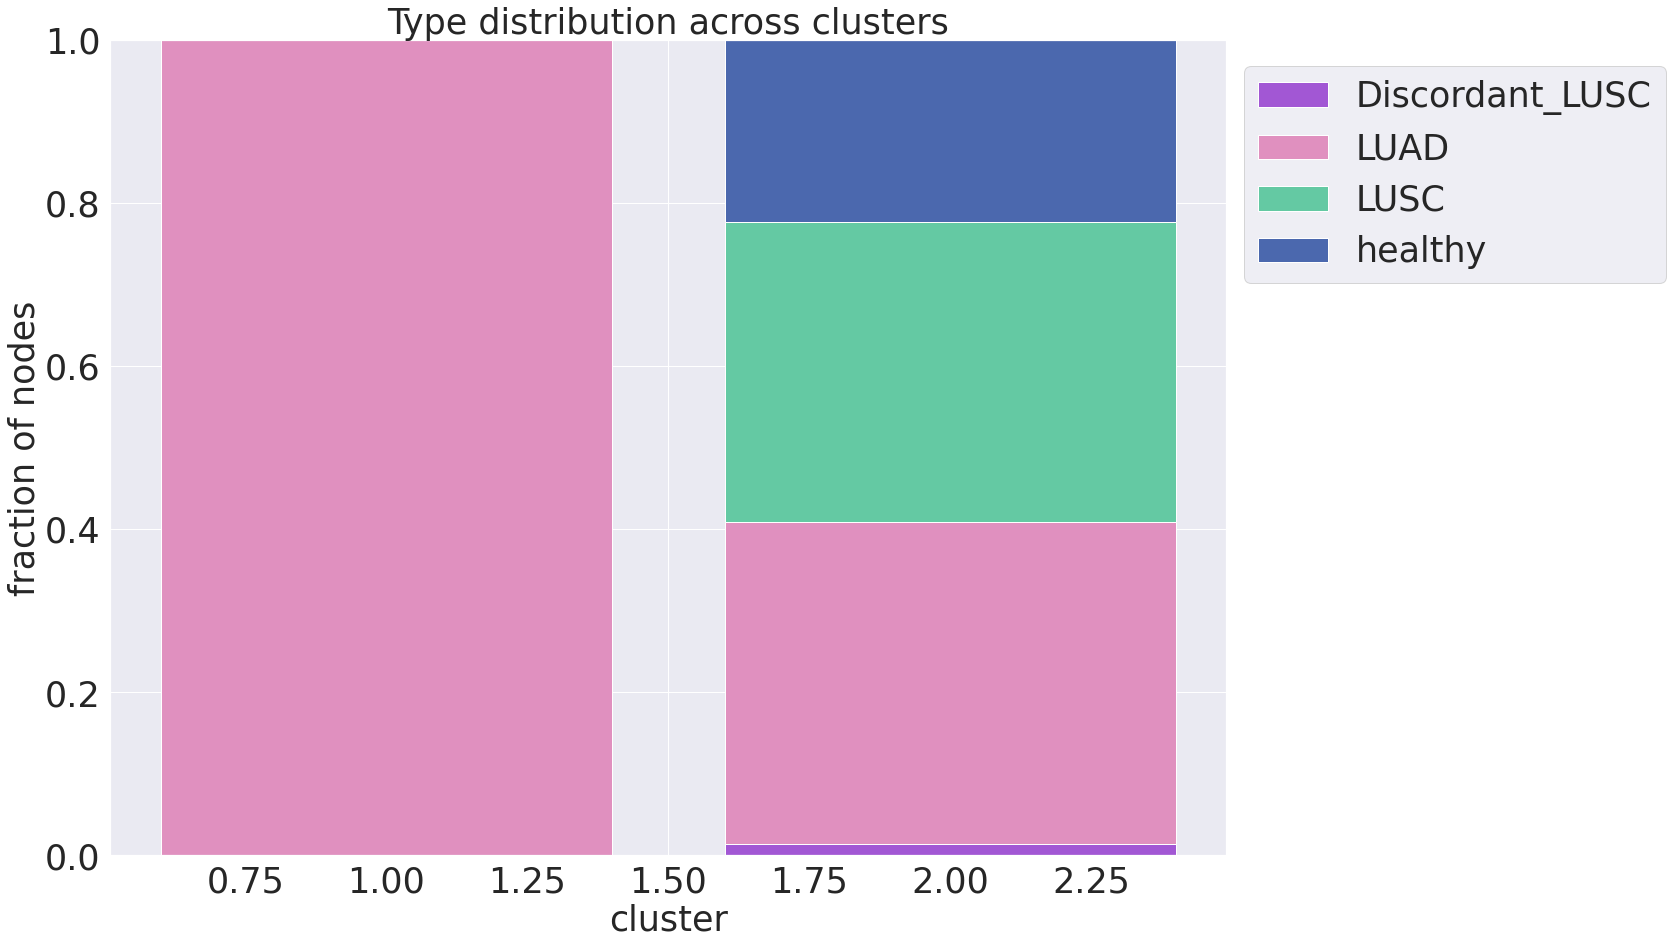

True Type 2


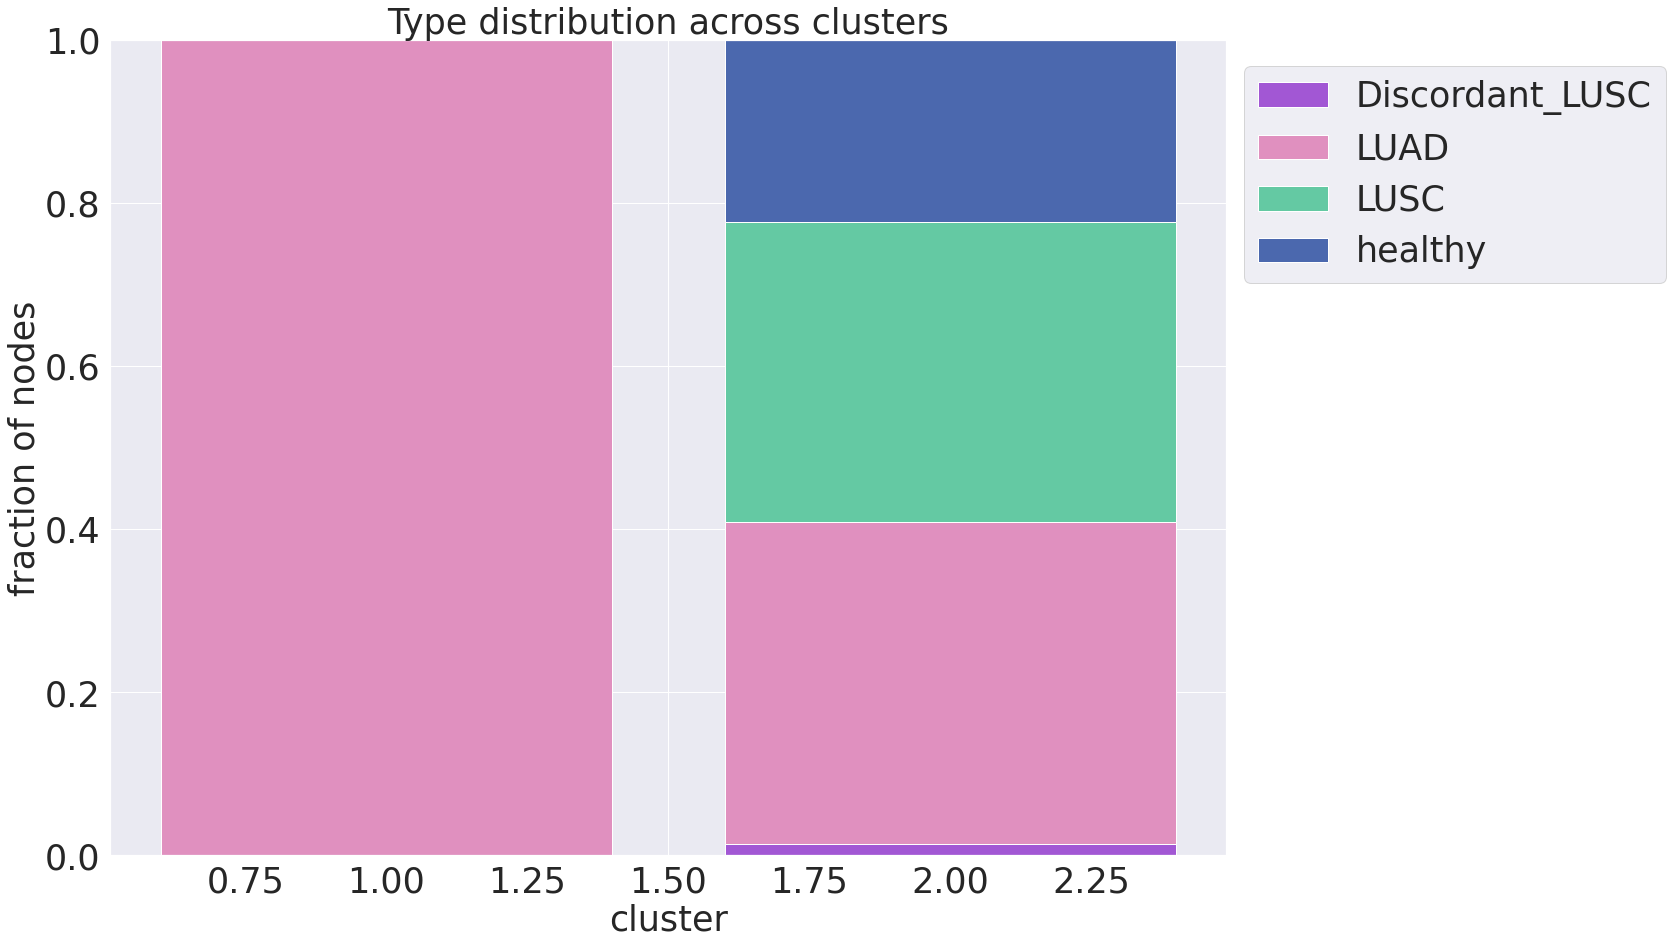

True Type 1


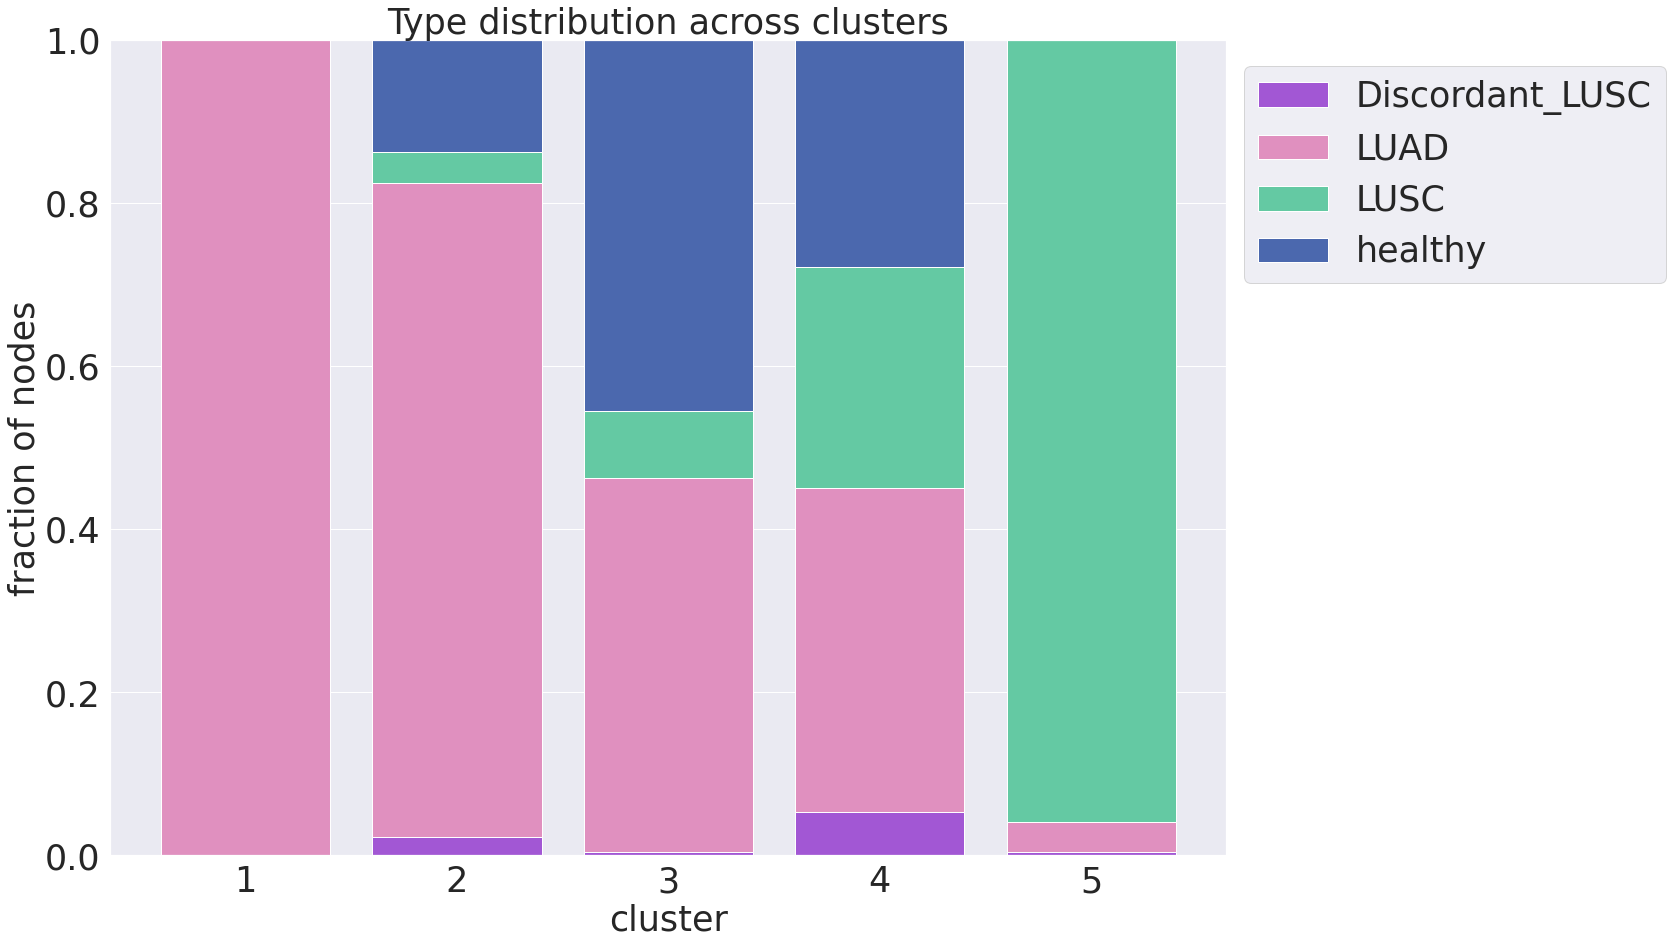

True Type 0


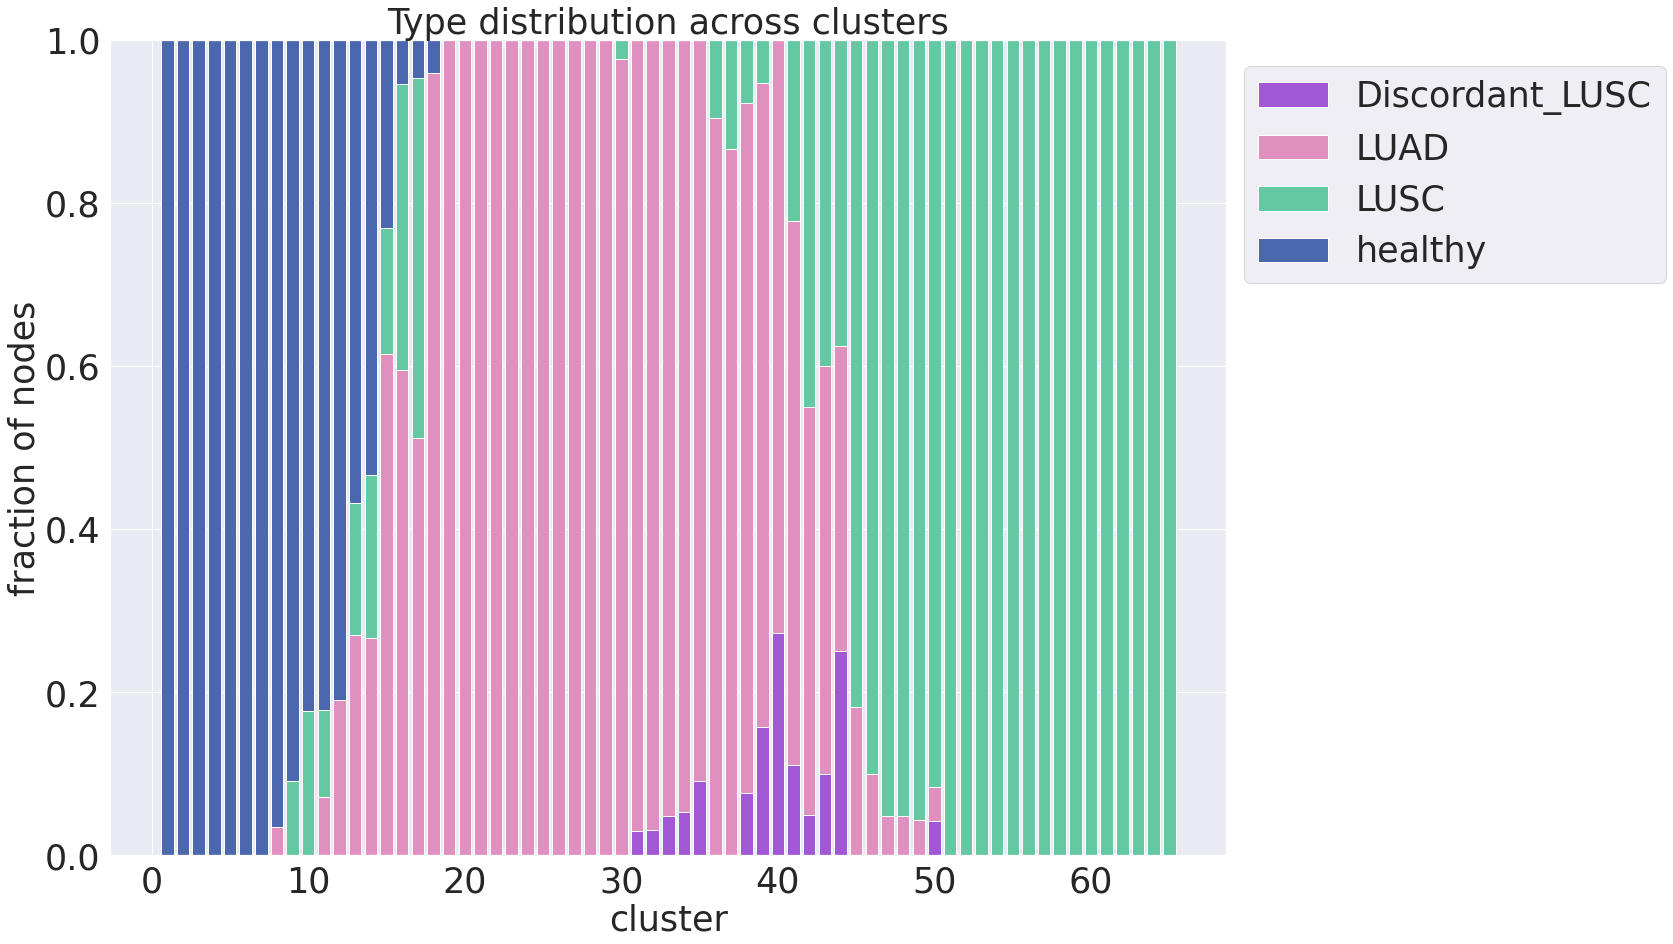

False Type 3


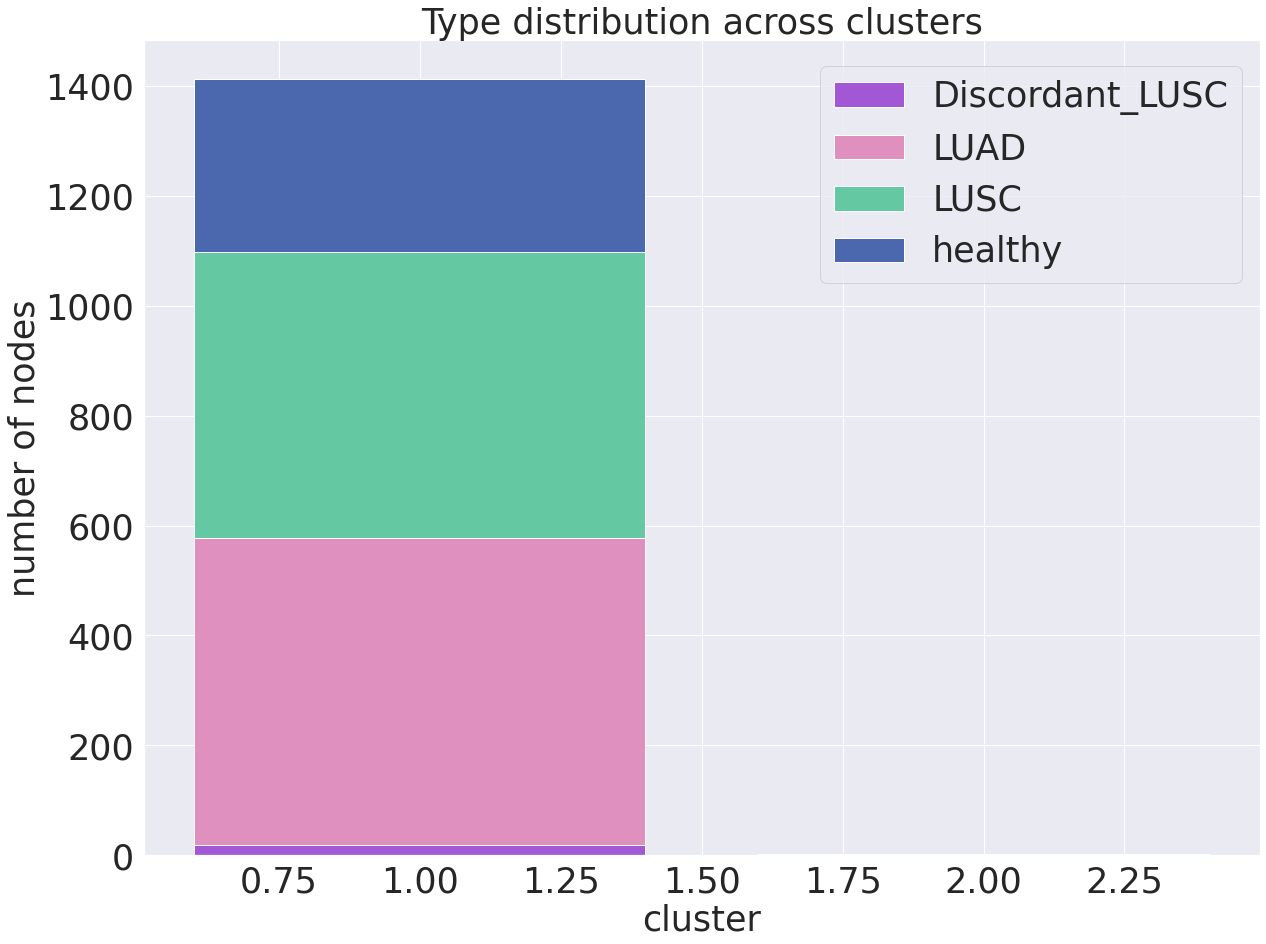

False Type 2


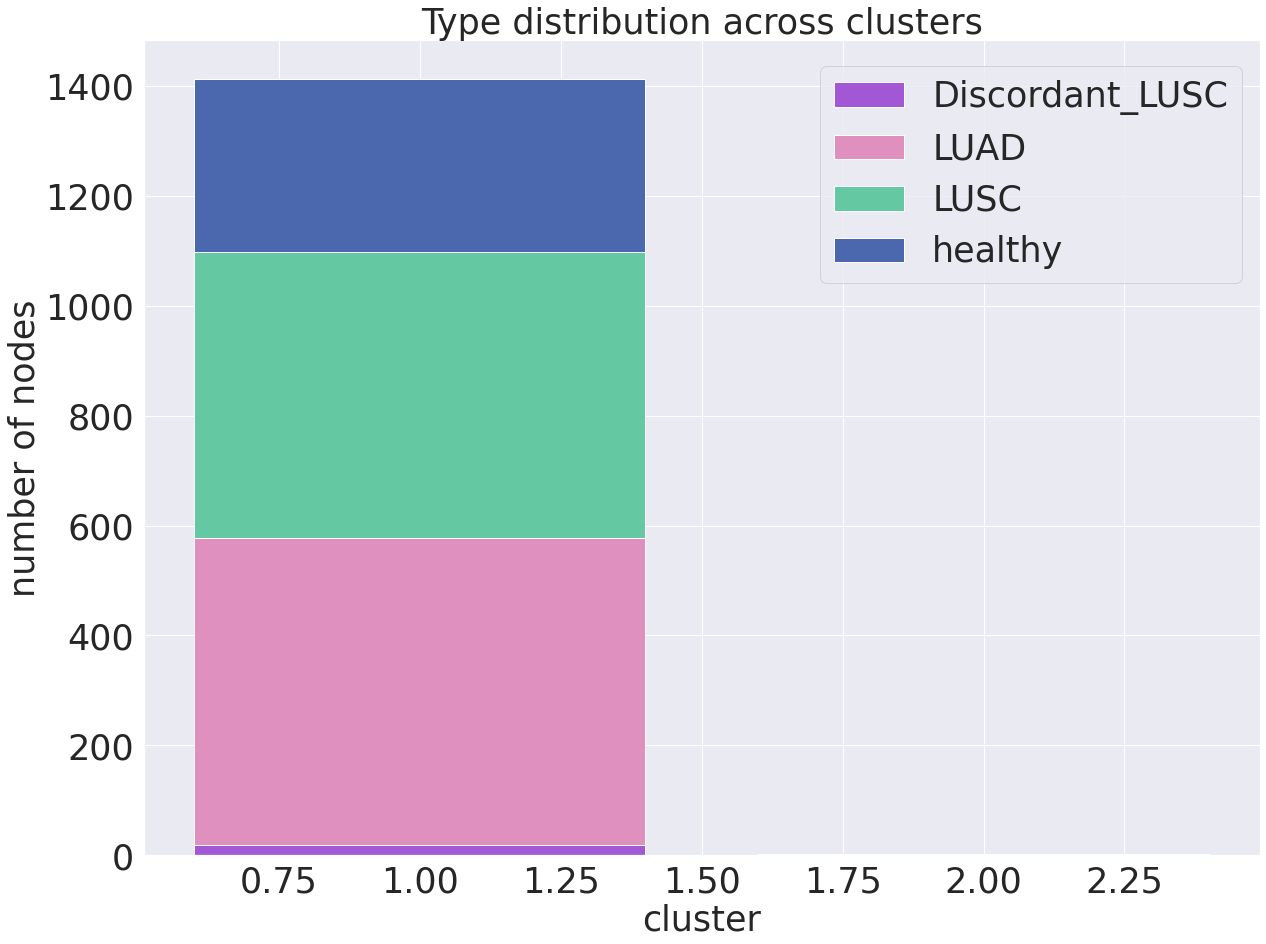

False Type 1


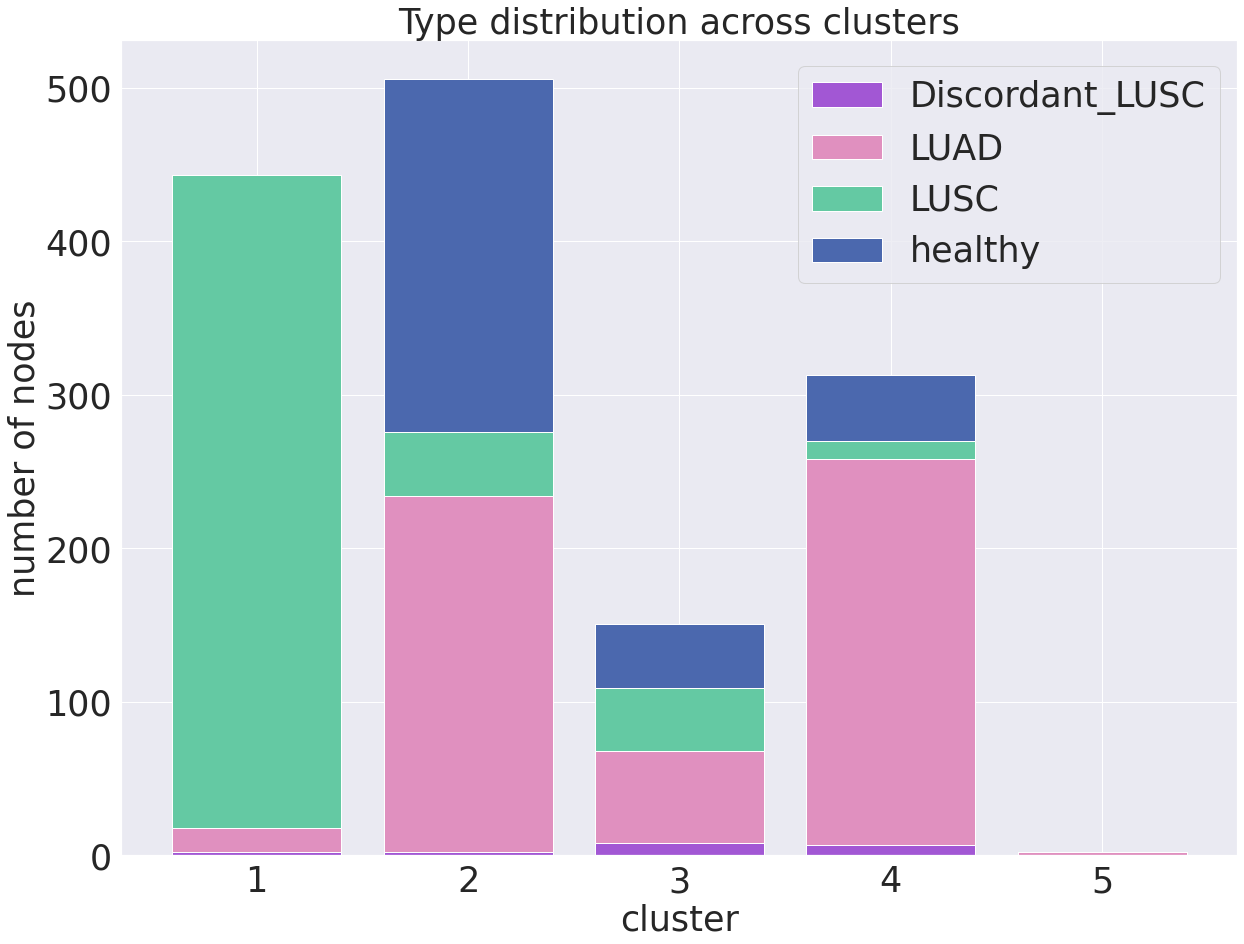

False Type 0


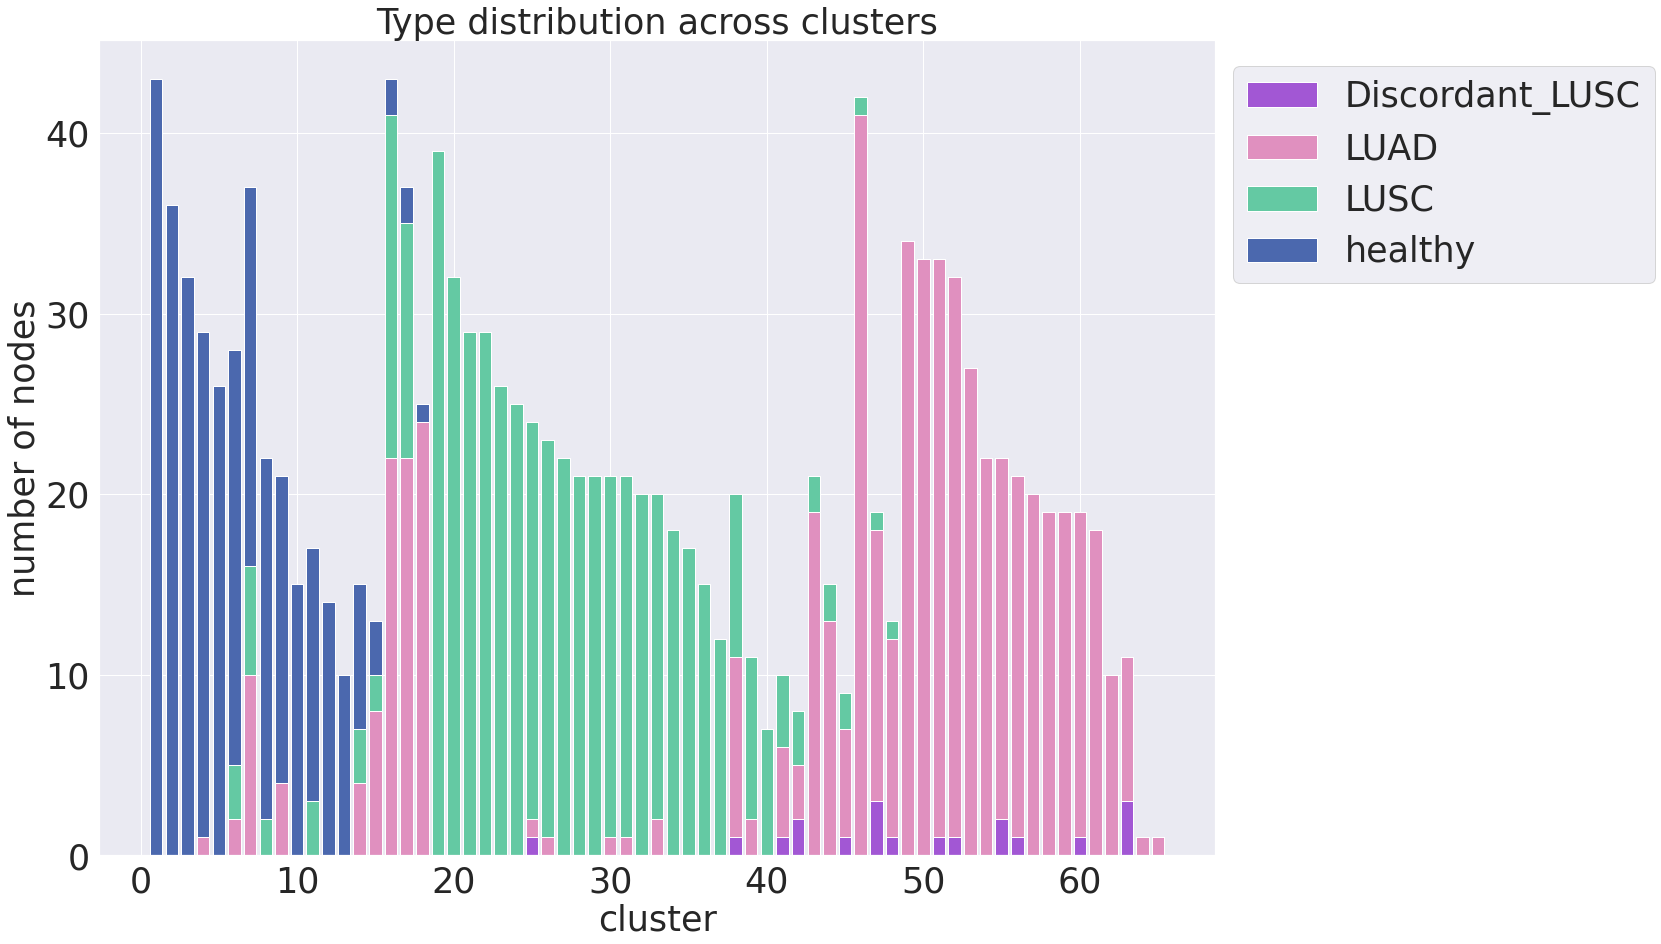

In [22]:
clusteranalysis(directory, labels)

### Plot Tree

In [23]:
def reindex(x):
    i=0
    last=x[0]
    new = []
    for xi in x:
        if xi == last:
            pass
        else:
            i+=1
            last=xi
        new.append(i)
    return new



df_labels = pd.DataFrame()
shape = df_clusters.dropna().shape
files = pd.read_csv("%s/%s/%s_level_3_clusters.csv"%(directory,algorithm,algorithm), header=[0]).astype(str).values.ravel()
files = files[files!="nan"]

for level in np.arange(L+1)[::-1]:
    df_clusters = pd.read_csv("%s/%s/%s_level_%d_clusters.csv"%(directory,algorithm,algorithm,level), header=[0])
    print("level ", level, "with ", df_clusters.shape[1], " clusters")
    currentlevellabels = []
    for file in files:
        s = df_clusters[df_clusters.isin([file])].any(0)
        a = s.index[s]
        currentlevellabels.append(int(a[0][8:])-1)
    df_labels.insert(0,'l%d'%level,currentlevellabels)
    del currentlevellabels
filelabels = []
filesublabels = []
for file in files:
    try:
        filelabels.append(get_file(file, df_files)[labels[0]])
    except:
        filelabels.append('unknown')
        print(*sys.exc_info())
    try:
        filesublabels.append(get_file(file, df_files)[labels[1]])
    except:
        filesublabels.append('unknown')

df_labels.insert(0,'tissue', filelabels)
df_labels.insert(0,'subtissue', filesublabels)
df_labels.sort_values(by=['tissue','subtissue'], inplace=True)
df_labels.sort_values(by=["l%d"%l for l in np.arange(L+1)[::-1]], axis=0, inplace=True)
filelabels = df_labels['tissue']
filesublabels = df_labels['subtissue']
df_labels = df_labels.apply(reindex, axis=0)
df_labels['tissue']=filelabels
df_labels['subtissue']=filesublabels
df_labels.to_csv("%s/%s/topsbm_labels.csv"%(directory,algorithm), index=False, header=True)

level  3 with  2  clusters
level  2 with  2  clusters
level  1 with  5  clusters
level  0 with  65  clusters
